<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [19]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [27]:
house = pd.read_csv('../../DSI-SF-4/datasets/housing_regression/housing.csv')
#house.info()
# house['age'] = 2016 - house['YearBuilt']
# set(house['MSSubClass'])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

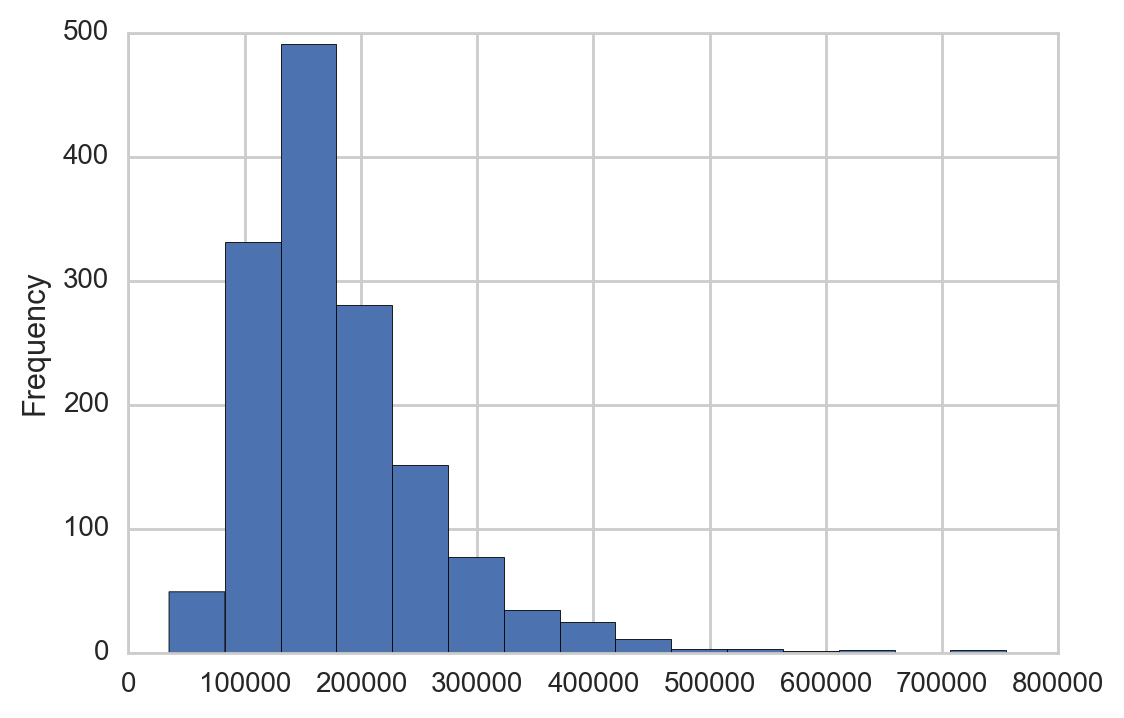

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

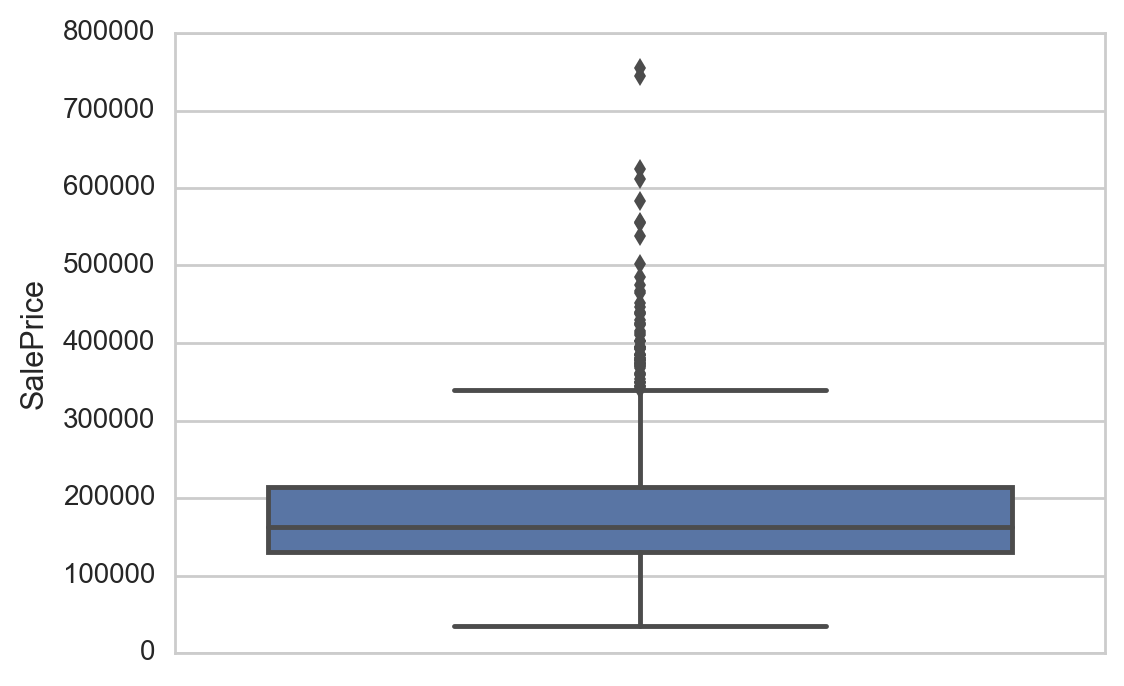

In [44]:
#
house['SalePrice'].plot.hist(bins=15)
plt.show()
sns.boxplot(data=house, y='SalePrice')
house['SalePrice'].describe().T

### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

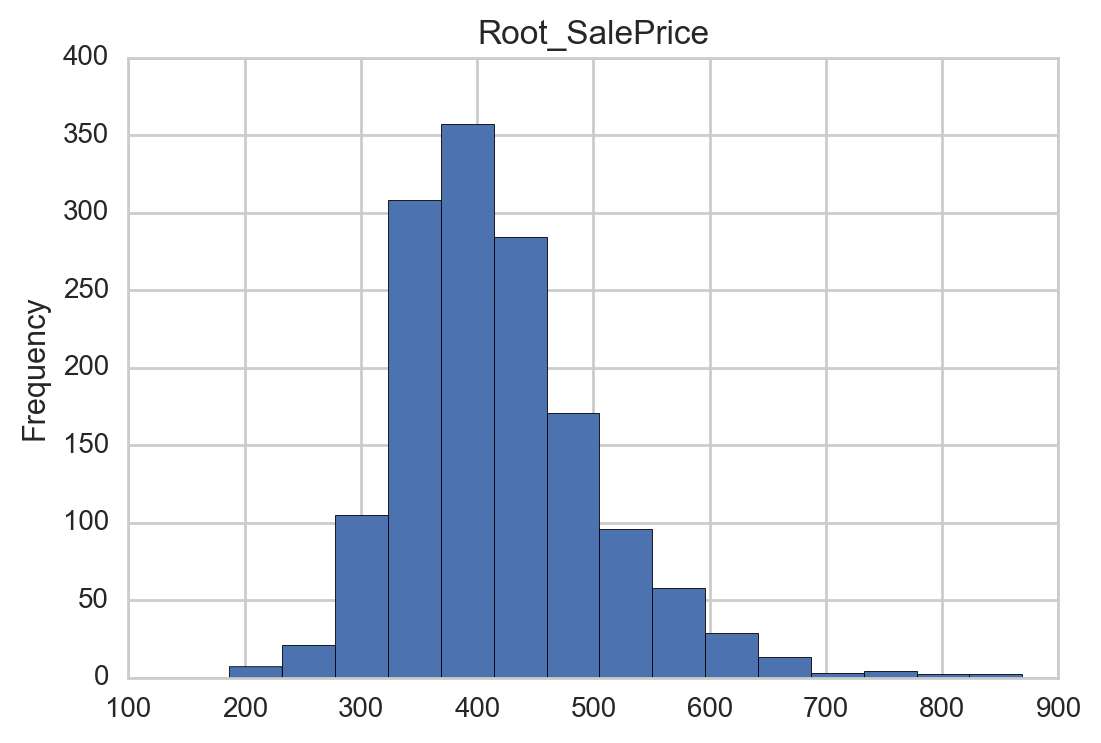

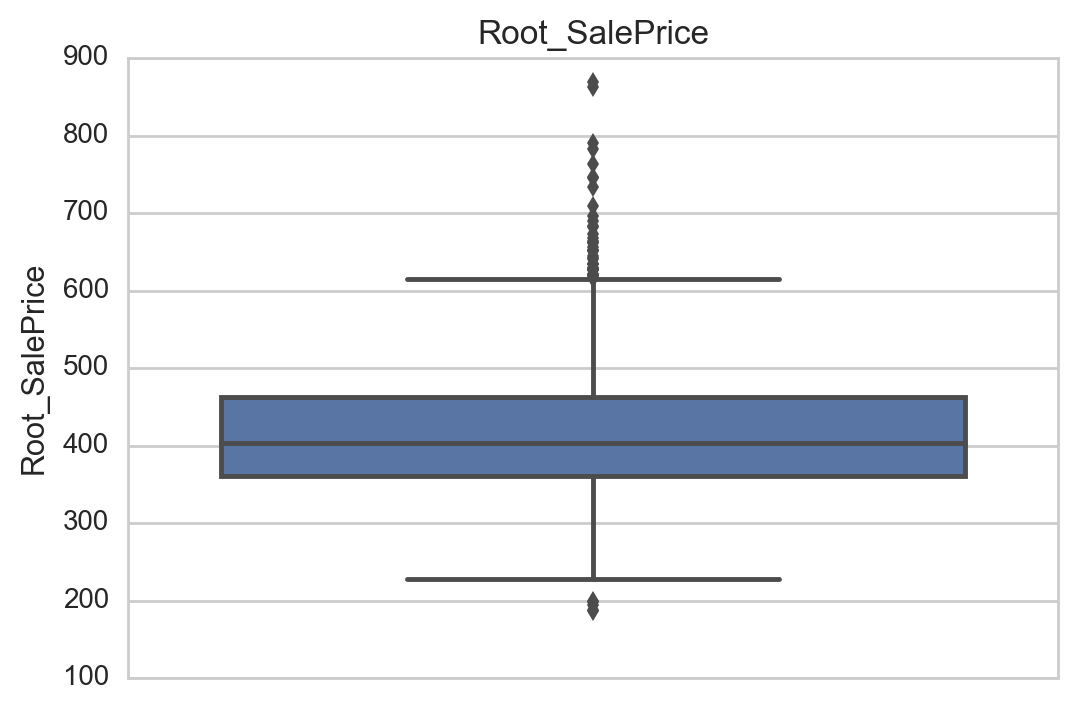

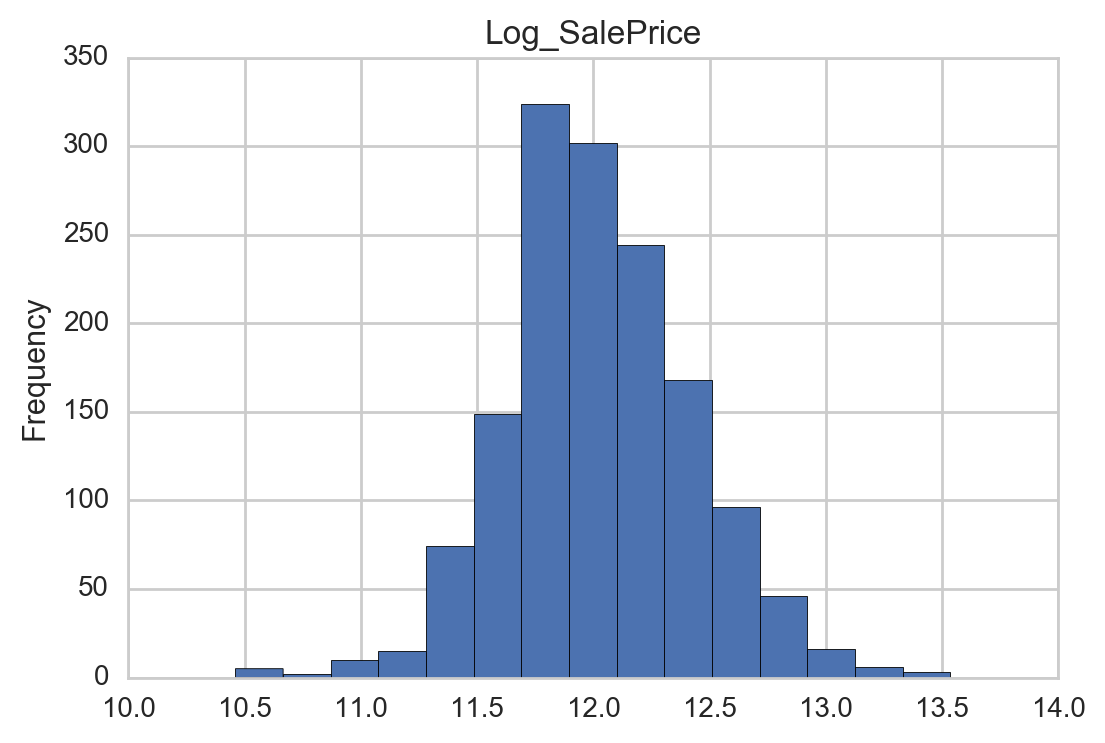

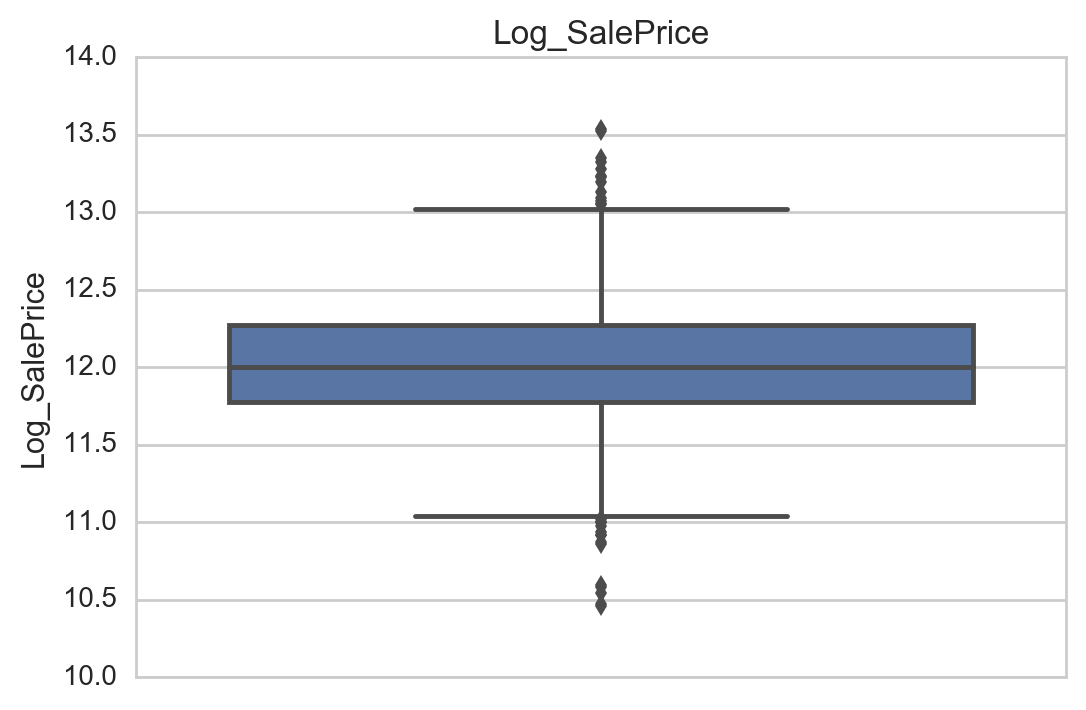

In [5]:
house['Root_SalePrice'] = house['SalePrice']**0.5
house['Log_SalePrice'] = np.log(house['SalePrice'])


def plot_twice(data_col):
    house[data_col].plot.hist(bins=15)
    plt.title(str(data_col))
    plt.show()
    sns.boxplot(data=house, y=data_col)
    plt.title(str(data_col))
    plt.show()
    
plot_twice('Root_SalePrice')
plot_twice('Log_SalePrice')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


### The magnatude of the correlation is greater after transformation.

In [6]:
house['age'] = 2016 - house['YearBuilt']
print stats.pearsonr(house['age'],house['SalePrice'])[0]
print stats.pearsonr(house['age'],house['Root_SalePrice'])[0]
print stats.pearsonr(house['age'],house['Log_SalePrice'])[0]


#The loged sa;es price has the strongest corlation

-0.522897332879
-0.564283906439
-0.586570240384


### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

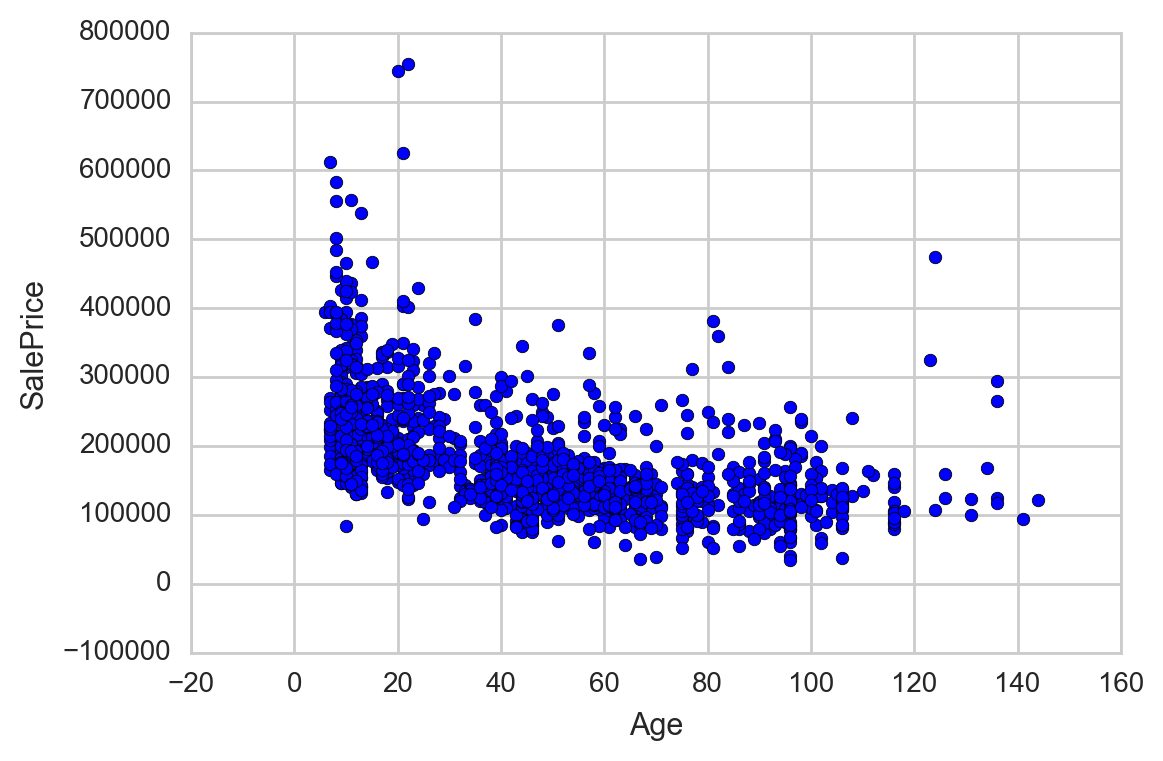

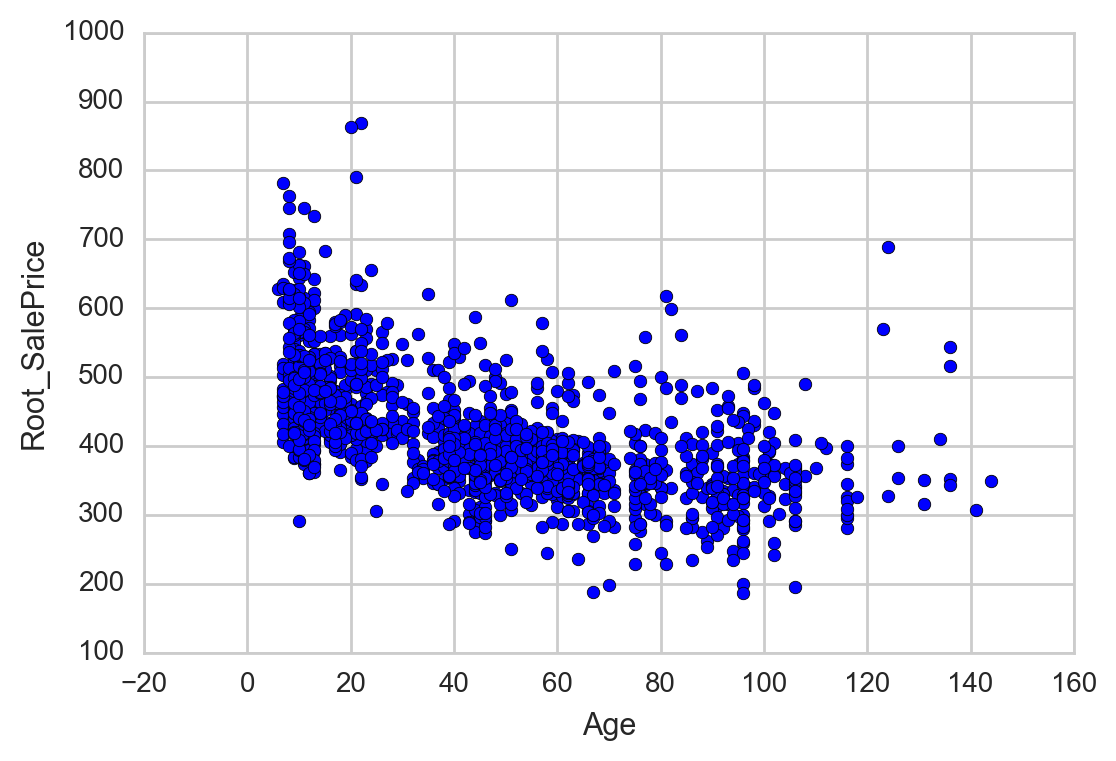

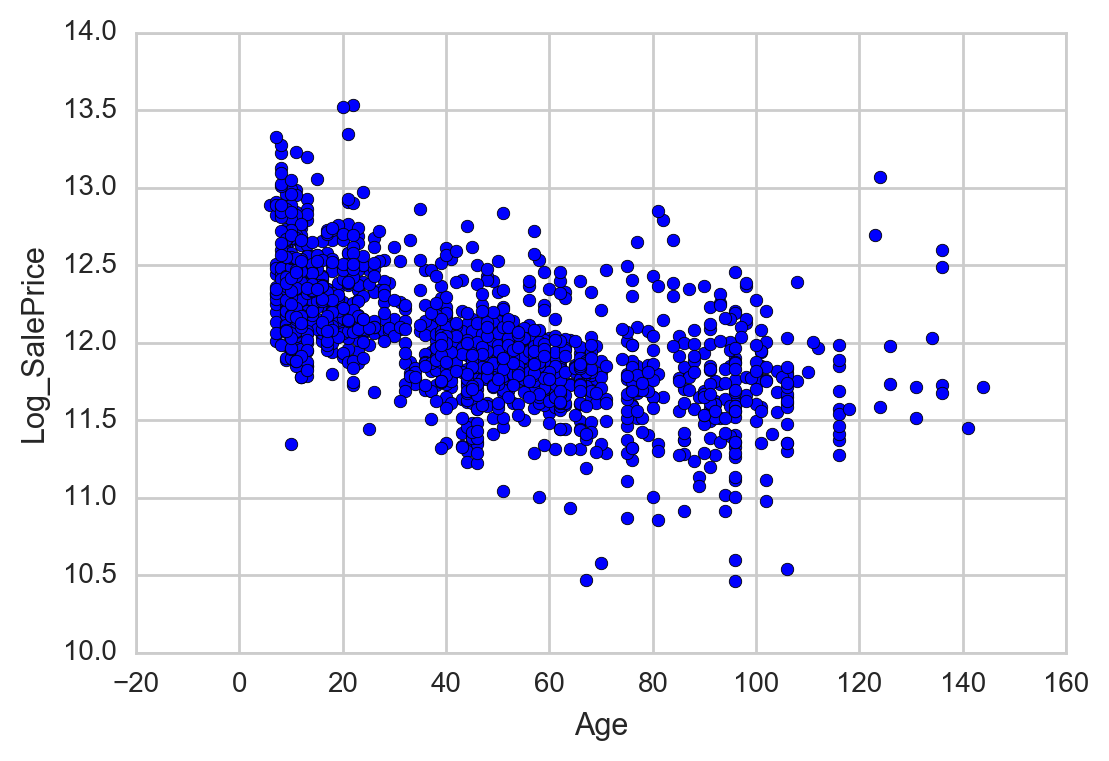

In [47]:
def make_scatter(col):
    plt.scatter(house['age'], house[col])
    plt.ylabel(str(col))
    plt.xlabel('Age')
    plt.show()
    
make_scatter('SalePrice')
make_scatter('Root_SalePrice')
make_scatter('Log_SalePrice')

#the chars show an incressing negitive corlation, it still lookes slightl curved. the sales data could be streched more...

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

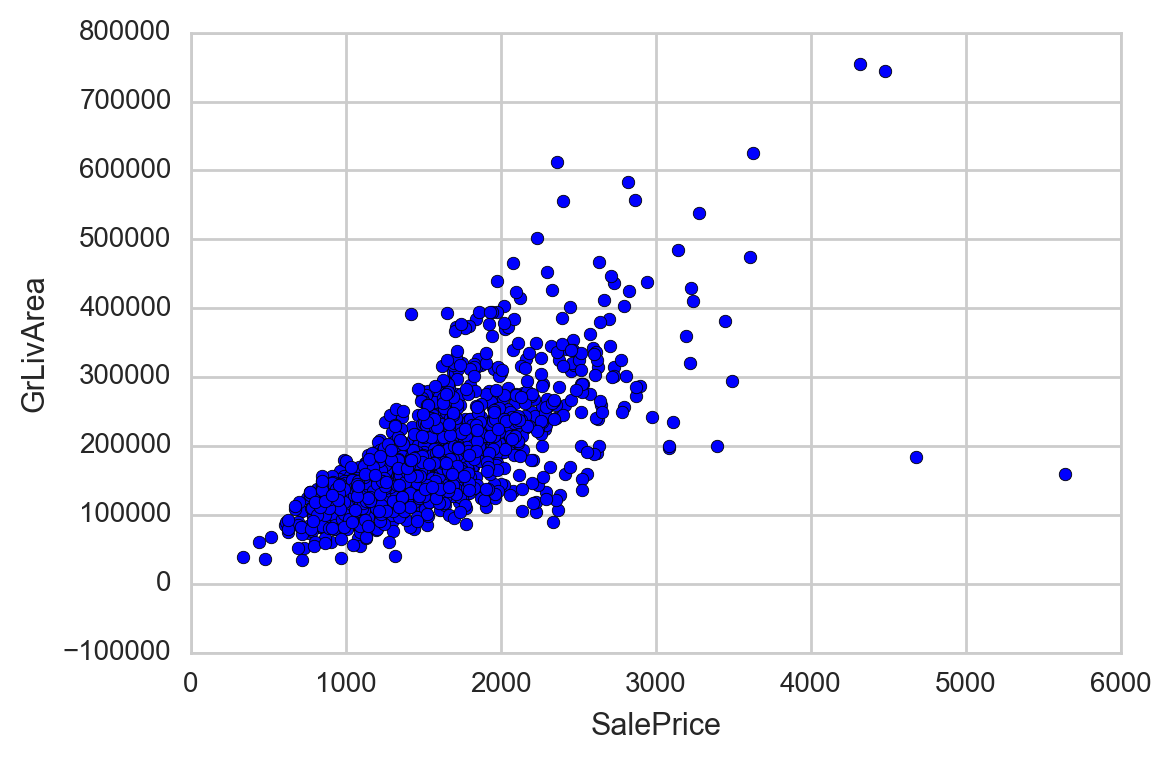

In [8]:
def make_scatter(col):
    plt.scatter(house[col], house['SalePrice'])
    plt.ylabel(str(col))
    plt.xlabel('SalePrice')
    plt.show()
    
make_scatter('GrLivArea')

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart sbows, if any?

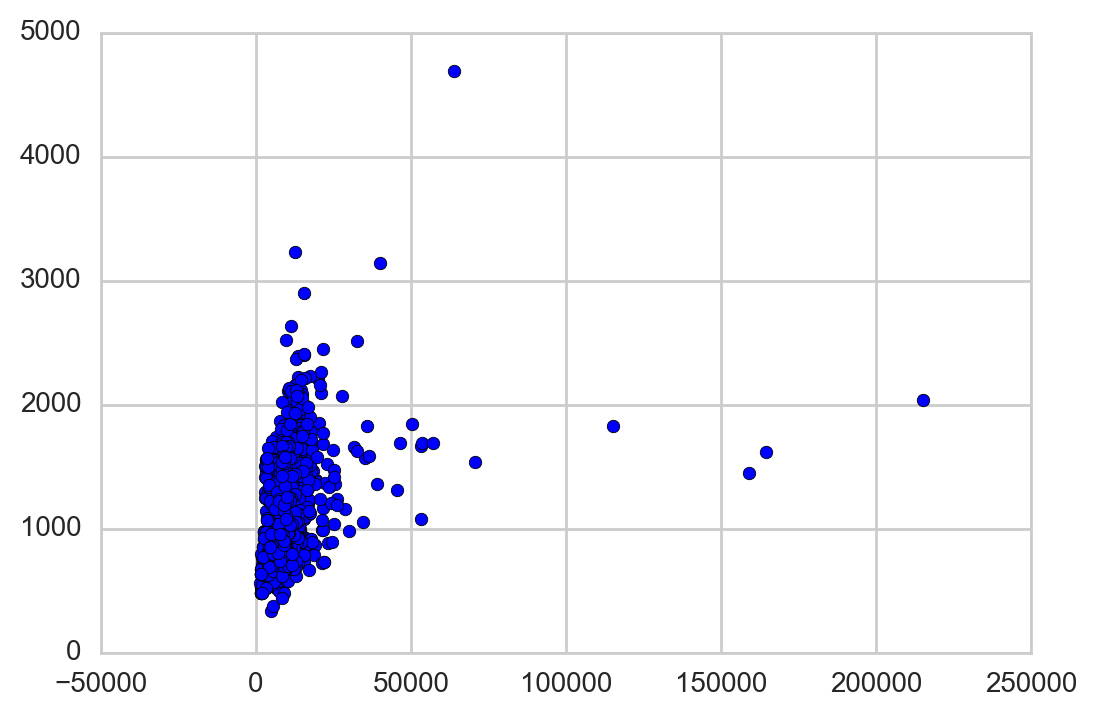

In [49]:
plt.scatter(house['LotArea'], house['1stFlrSF'])

#there seem to be a miled corlation with the exeption on some very large propers that persumably dont need bigger homes.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [23]:
# r_house_mask = [(house["MSZoning"] == 'RL') or (house["MSZoning"] == 'RH') or (house["MSZoning"] == 'RM')]
# #r_house = house[r_house_mask]
# r_house_mask

house = house[house['MSZoning'].isin(['RL','RM','RH'])]

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [24]:
# lot_size = house[['LotFrontage','LotArea']]
# lot_size = lot_size[lot_size['LotFrontage']>0]
# plt.scatter(lot_size['LotFrontage'], lot_size['LotArea'])
# print stats.pearsonr(lot_size['LotFrontage'], lot_size['LotArea'])
# #print house.info(), lot_size.info()


In [31]:
house = pd.read_csv('../../DSI-SF-4/datasets/housing_regression/housing.csv')


house.Alley = house.Alley.fillna(value='None')
house.FireplaceQu = house.FireplaceQu.fillna(value='None')
house.MiscFeature = house.MiscFeature.fillna(value='None')
house.PoolQC = house.PoolQC.fillna(value='None')
house.Fence = house.Fence.fillna(value='None')

house.GarageType = house.GarageType.fillna(value='None')
house.GarageYrBlt = house.GarageYrBlt.fillna(value='None')
house.GarageFinish = house.GarageFinish.fillna(value='None')
house.GarageCond = house.GarageCond.fillna(value='None')
house.GarageQual = house.GarageQual.fillna(value='None')

house.BsmtCond = house.BsmtCond.fillna(value='None')
house.BsmtExposure = house.BsmtExposure.fillna(value='None')
house.BsmtFinType1 = house.BsmtFinType1.fillna(value='None')
house.BsmtQual = house.BsmtQual.fillna(value='None')
house.BsmtFinType2 = house.BsmtFinType2.fillna(value='None')



# print house.GarageType.value_counts()
# print house.BsmtFinSF1.head(10), house.BsmtCond.head(10)

# house.info()

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

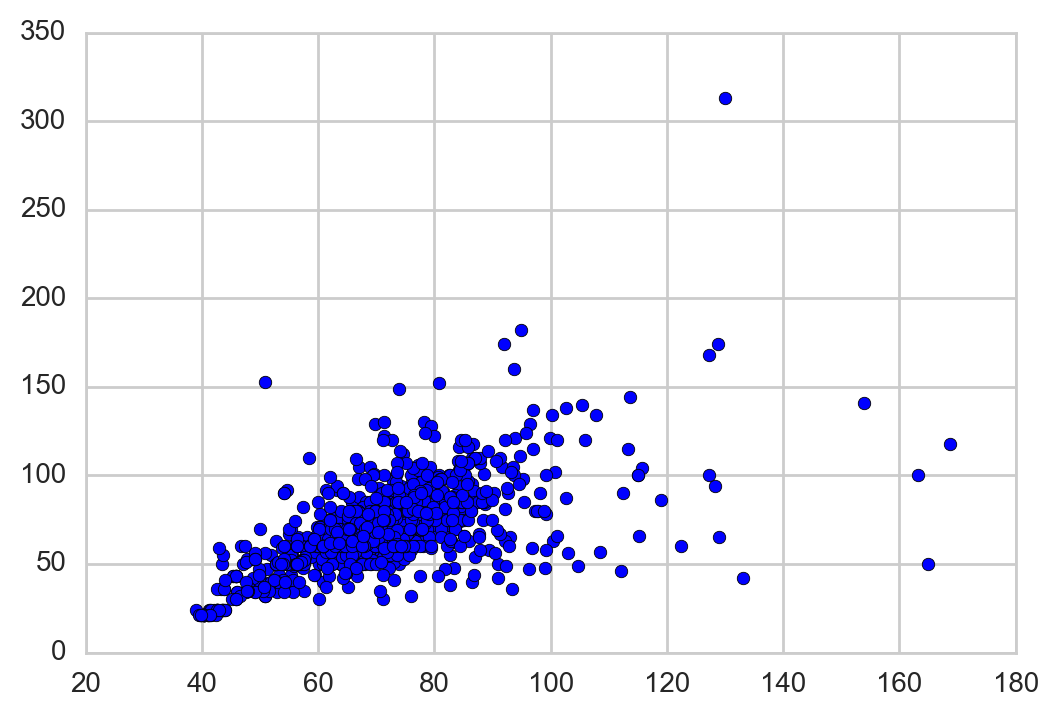

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1451 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
Alley            1451 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non

In [32]:

temp_raw = house[['LotFrontage','LotArea','LotShape',]]
temp = temp_raw
unknown_indxs = temp[temp['LotFrontage'].isnull()].index
unkown =  temp[temp['LotFrontage'].isnull()]
temp = temp[temp['LotFrontage']>0]
temp['LotArea_z_score'] = (temp['LotArea'] - temp['LotArea'].mean())/temp['LotArea'].std(ddof=0)
temp = temp[temp.LotArea_z_score < 3.5]
temp.drop('LotArea_z_score', axis=1, inplace=True)
temp = temp[temp['LotFrontage']>0]

def is_IR1(row):
    if row == 'IR1':
        return 1
    else:
        return 0
    
def is_IR2(row):
    if row == 'IR2':
        return 1
    else:
        return 0
    
def is_IR3(row):
    if row == 'IR3':
        return 1
    else:
        return 0
    
def is_Reg(row):
    if row == 'Reg':
        return 1
    else:
        return 0

def check_lot_area(temp):
    #print set(temp.LotShape)
    temp['Is_IR1'] = temp.LotShape.apply(is_IR1)
    temp['Is_IR2'] = temp.LotShape.apply(is_IR2)
    temp['Is_IR3'] = temp.LotShape.apply(is_IR3)
    temp['Is_Reg'] = temp.LotShape.apply(is_Reg)
    
    unkown['Is_IR1'] = unkown.LotShape.apply(is_IR1)
    unkown['Is_IR2'] = unkown.LotShape.apply(is_IR2)
    unkown['Is_IR3'] = unkown.LotShape.apply(is_IR3)
    unkown['Is_Reg'] = unkown.LotShape.apply(is_Reg)
    
    y = temp.pop('LotFrontage')
    temp.drop('LotShape', axis=1, inplace=True)
    lm = LinearRegression()
    lm_model = lm.fit(temp, y)
    preds = lm_model.predict(temp)
    # print lm_model.predict(temp)[:5]
    # print y[:5]
    # print temp.head()

#     plt.scatter(preds, y)
#     #print stats.pearsonr(preds, y)
#     plt.show()
    unkown.drop('LotShape', axis=1, inplace=True)
    unkown_y = unkown.pop('LotFrontage') #is full of nan
    new_preds = lm_model.predict(unkown)
    new_preds = pd.DataFrame(new_preds, index=unknown_indxs, columns=['LotFrontage'])
    #print new_preds.index.values
    #temp_raw.fillna(value=new_preds)
    #print temp_raw.info()
    return new_preds

new_preds = check_lot_area(temp)


del temp, unkown, unknown_indxs, temp_raw

house_new = house

for idx in new_preds.index.values:
    house_new.LotFrontage[idx] = new_preds.LotFrontage[idx]

house_full = house_new.dropna()
house_full.info()



In [142]:
house.LotShape.value_counts()

3    925
0    484
1     41
2     10
Name: LotShape, dtype: int64

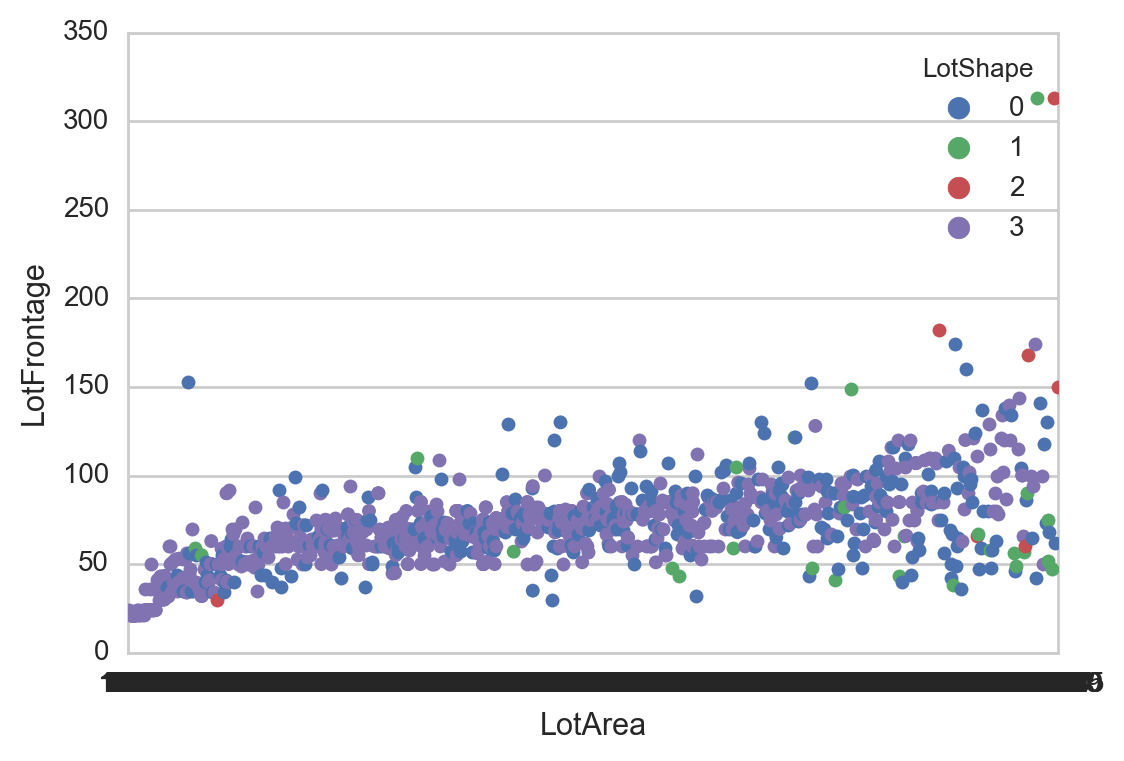

In [141]:
sns.swarmplot(data=house, x='LotArea', y='LotFrontage', hue='LotShape')

In [33]:
# sns.heatmap(data=house[['LotArea','LotFrontage','LotShape']])
# plot_data = house[['LotArea','LotFrontage','LotShape']]
# colors = ['r','b','k','g']
# for x in range (0,4):
#     plot_data = plot_data[plot_data['LotShape']==x]
#     fig, ax = plt.subplot()
#     ax.scatter(plot_data['LotArea'], plot_data['LotFrontage'], c=colors[x])
    
# # plt.show()
# sns.factorplot(data=plot_data, color='LotShape')
# plt.map(plt.scatter(plot_data['LotArea'], plot_data['LotFrontage']))

### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [ ]:
#it would be good to drop the Utilities column.
# there are two catagories in these column and one has only one obsevation. 

house_full.drop('Utilities',axis=1,inplace=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

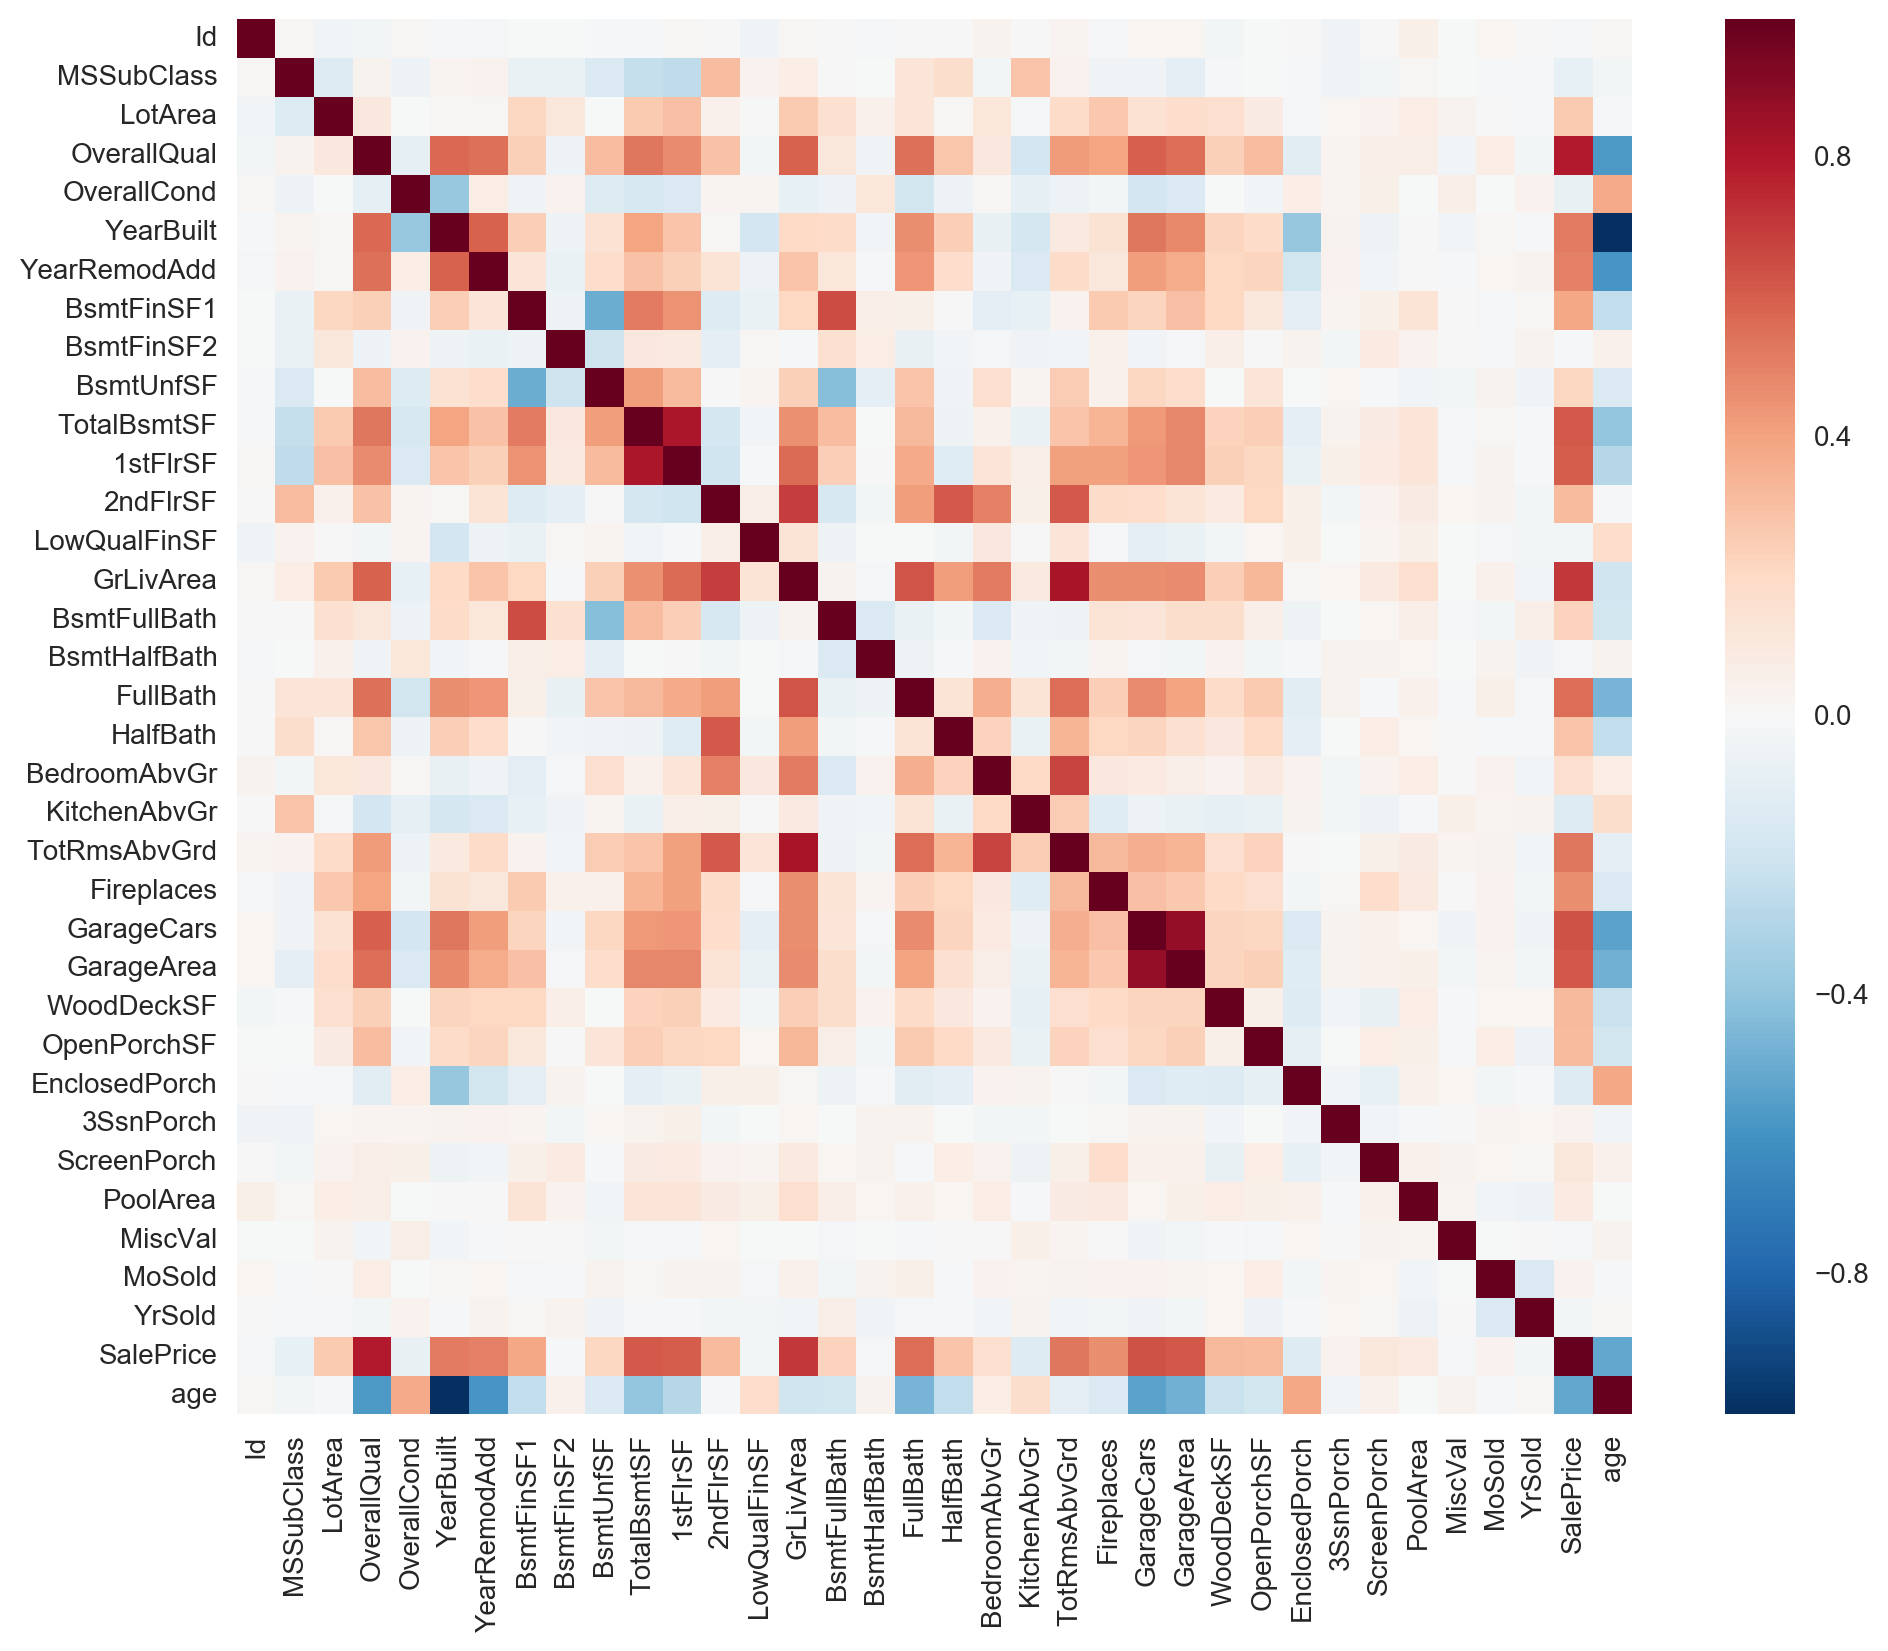

In [53]:
continues = house.select_dtypes(include=['int64'])
# floats are missing. could plot but its so much to look at!!!
#plt.matshow(continues.corr())
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(continues.corr(), vmax=.8, square=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

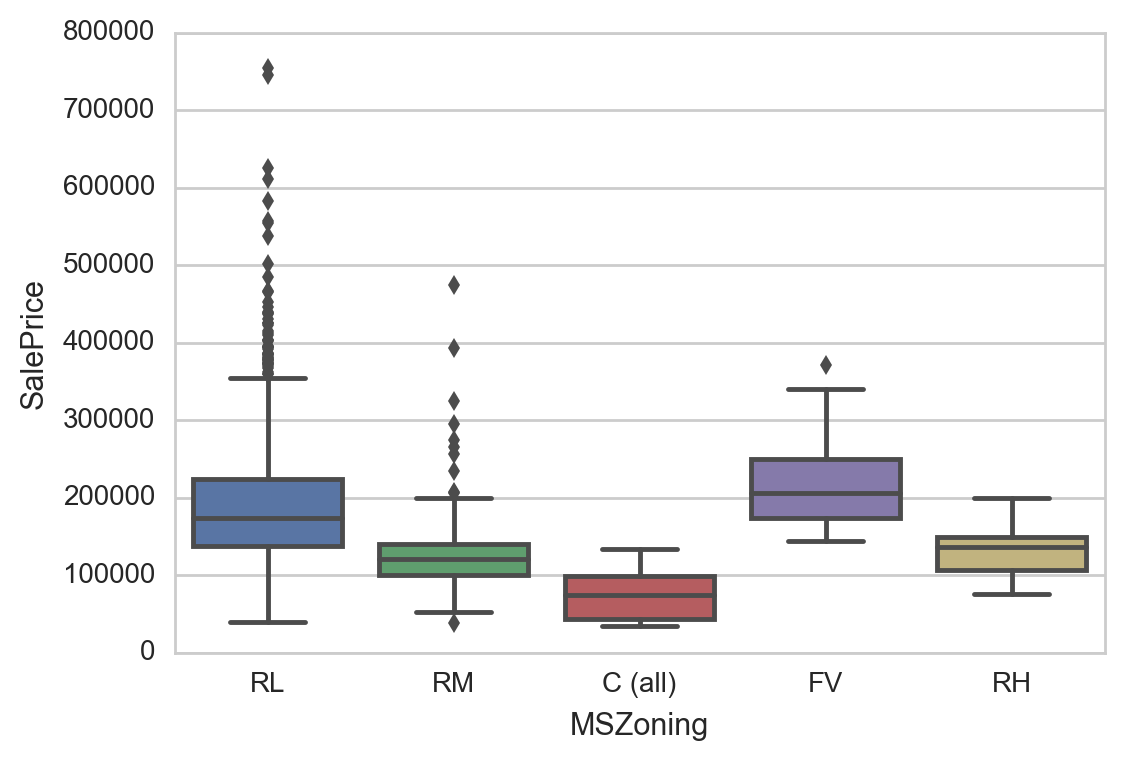

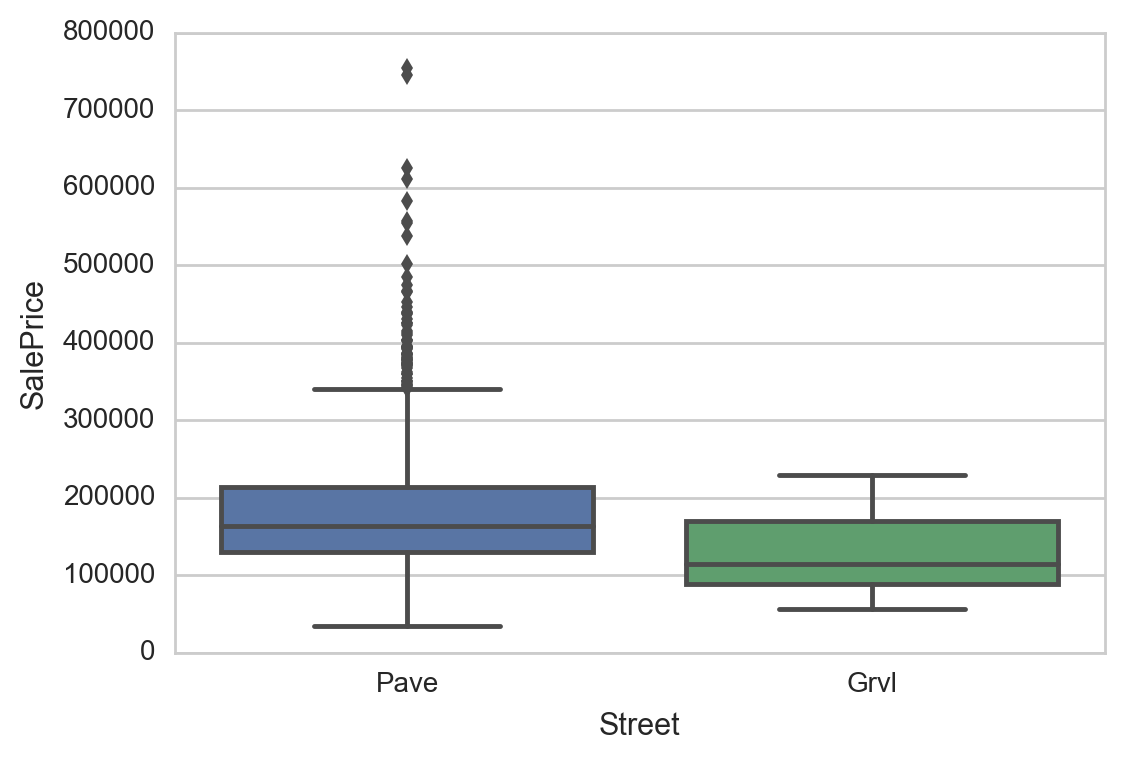

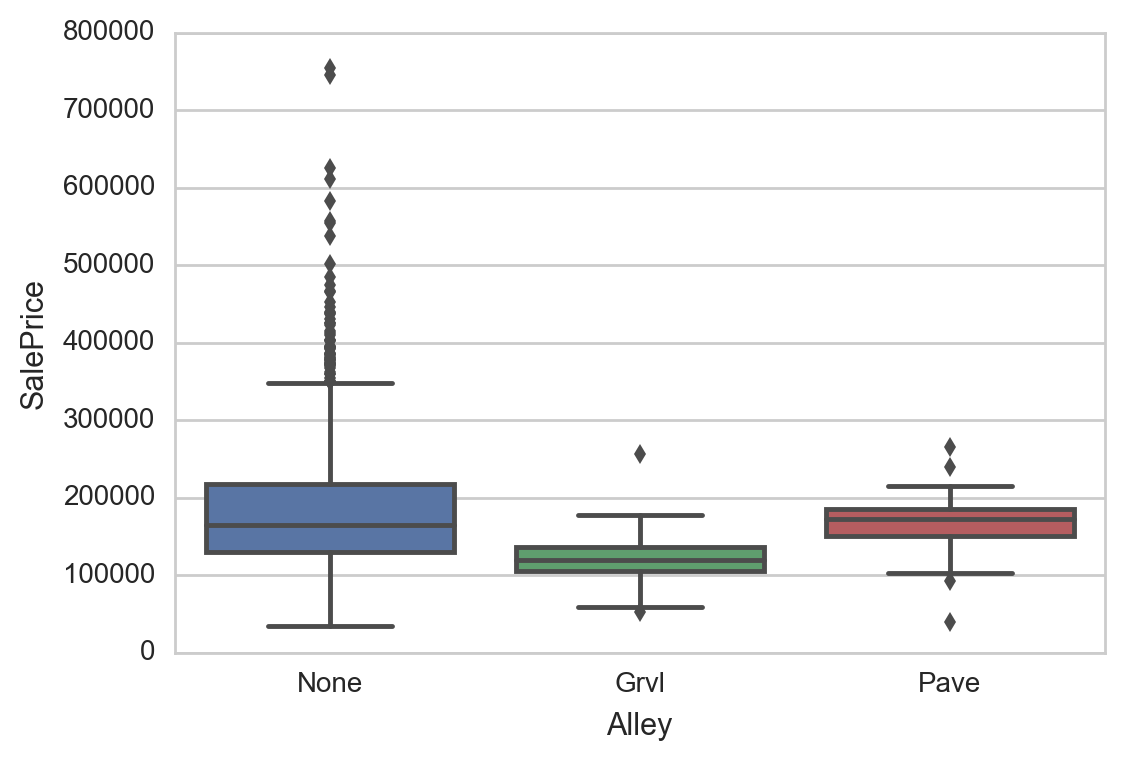

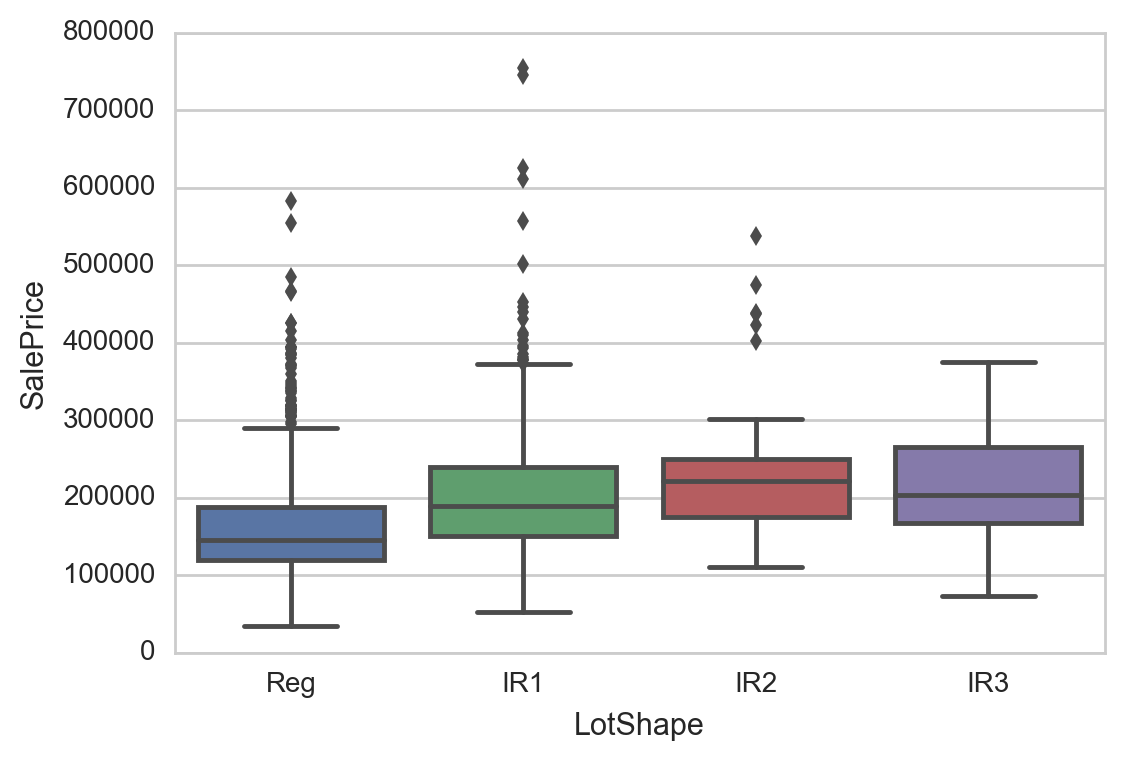

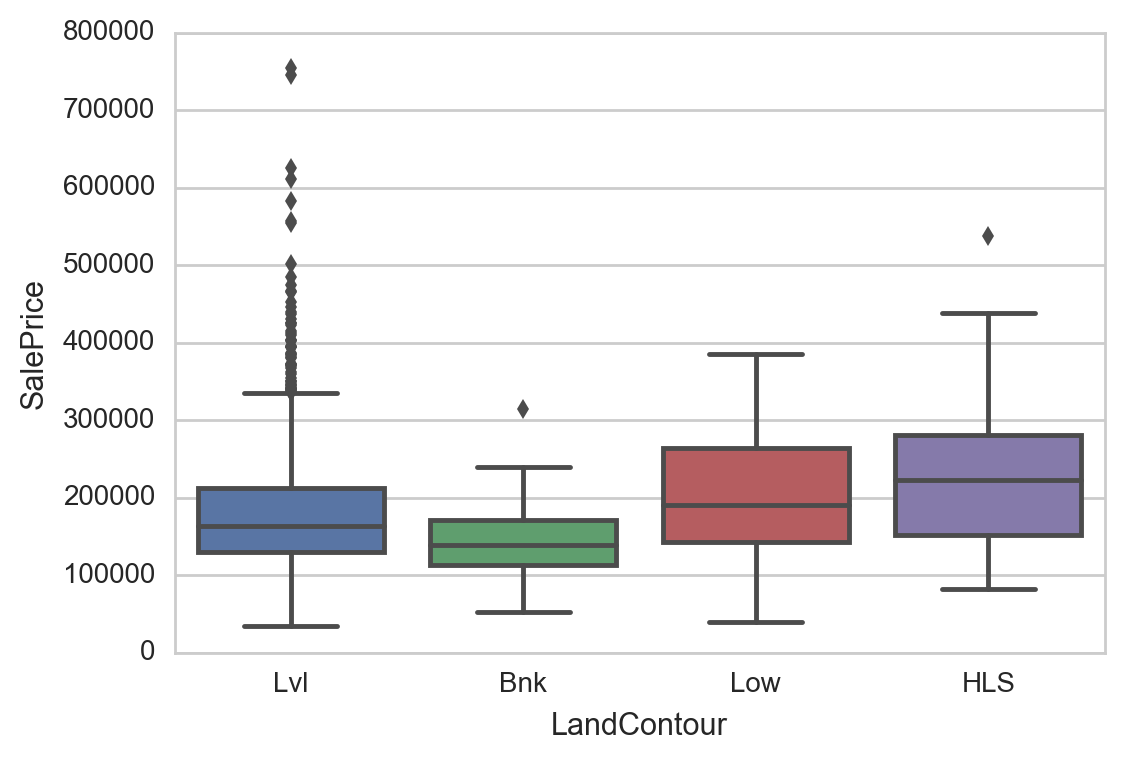

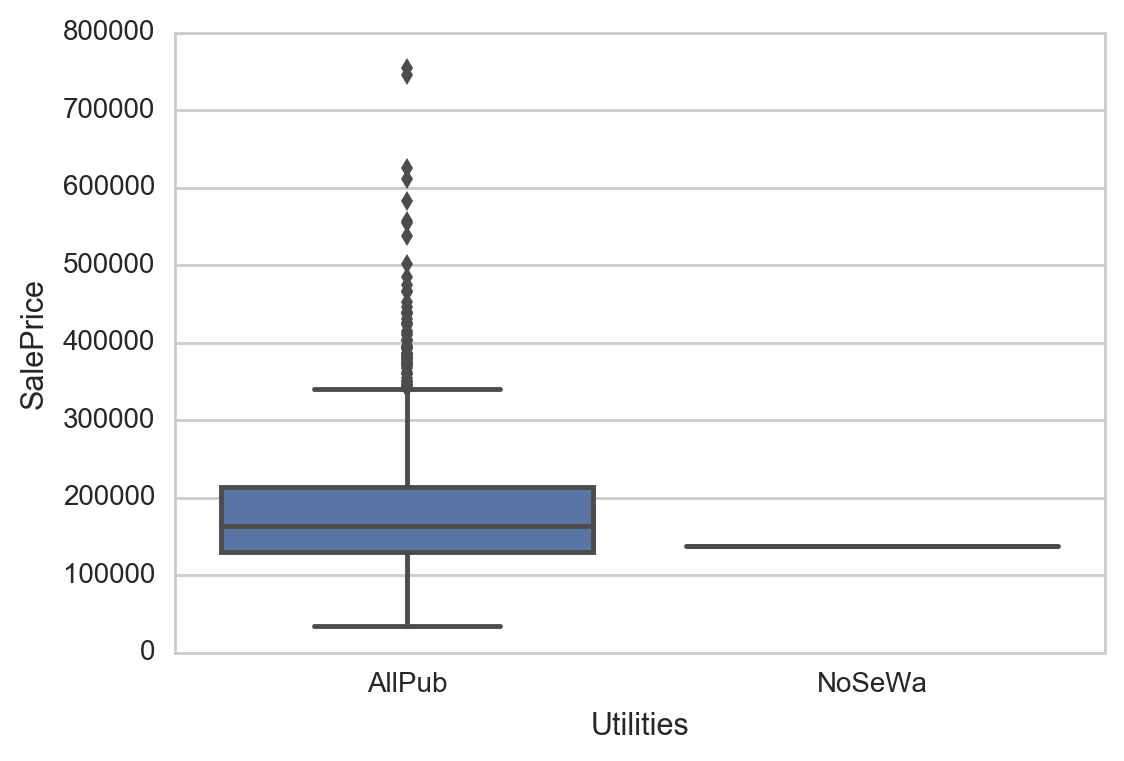

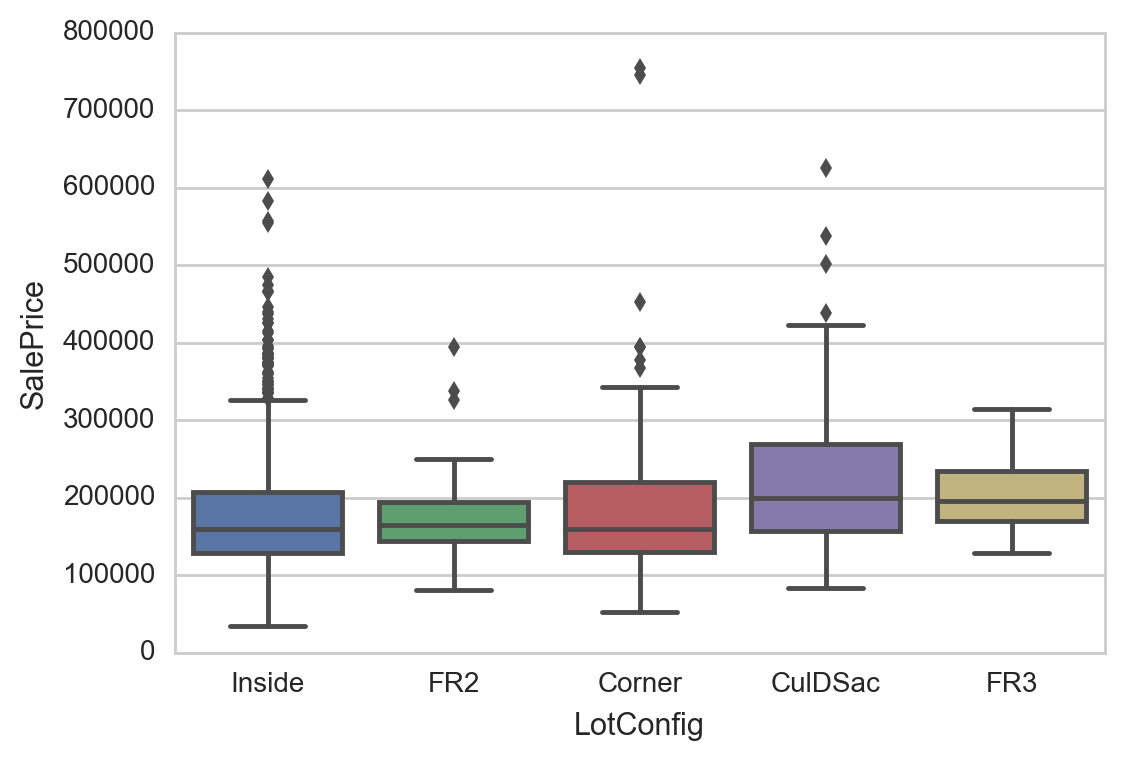

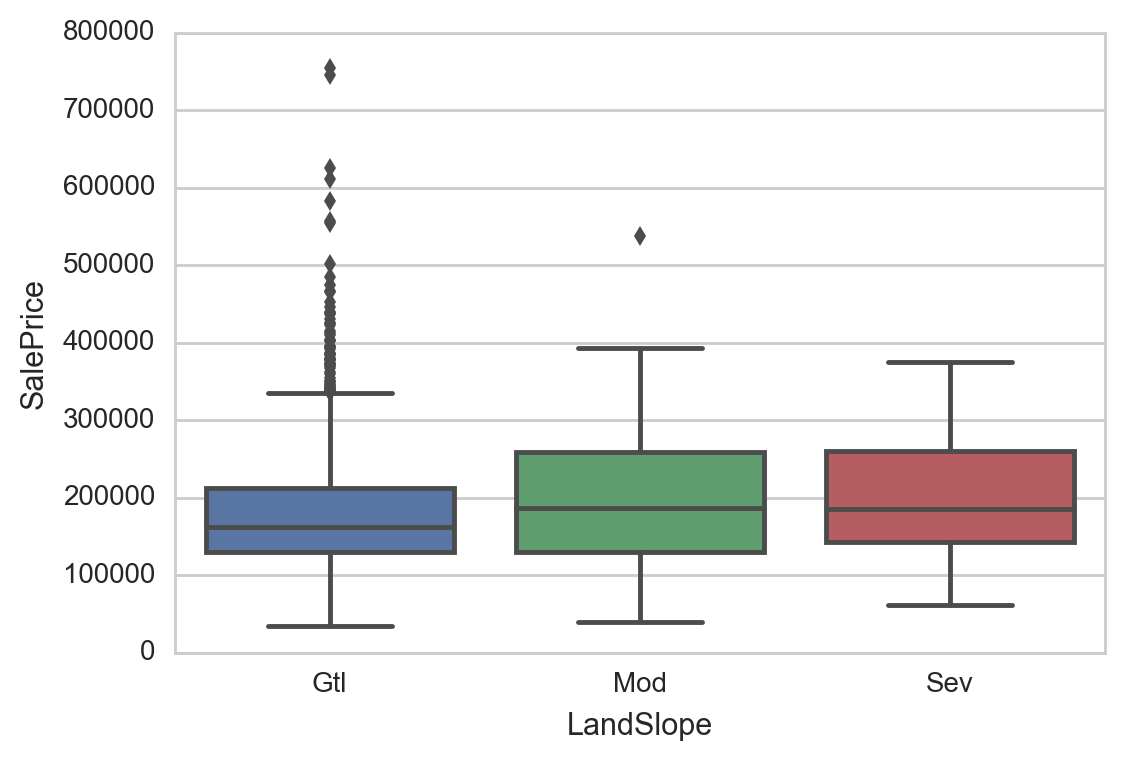

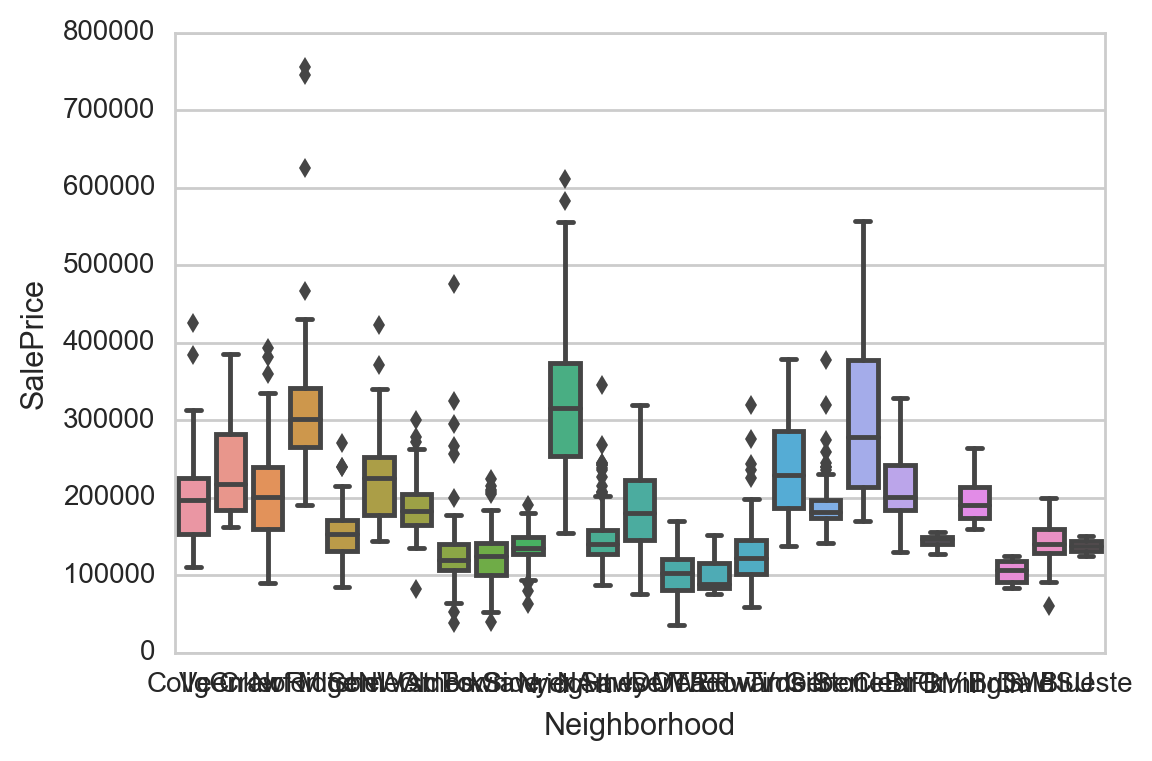

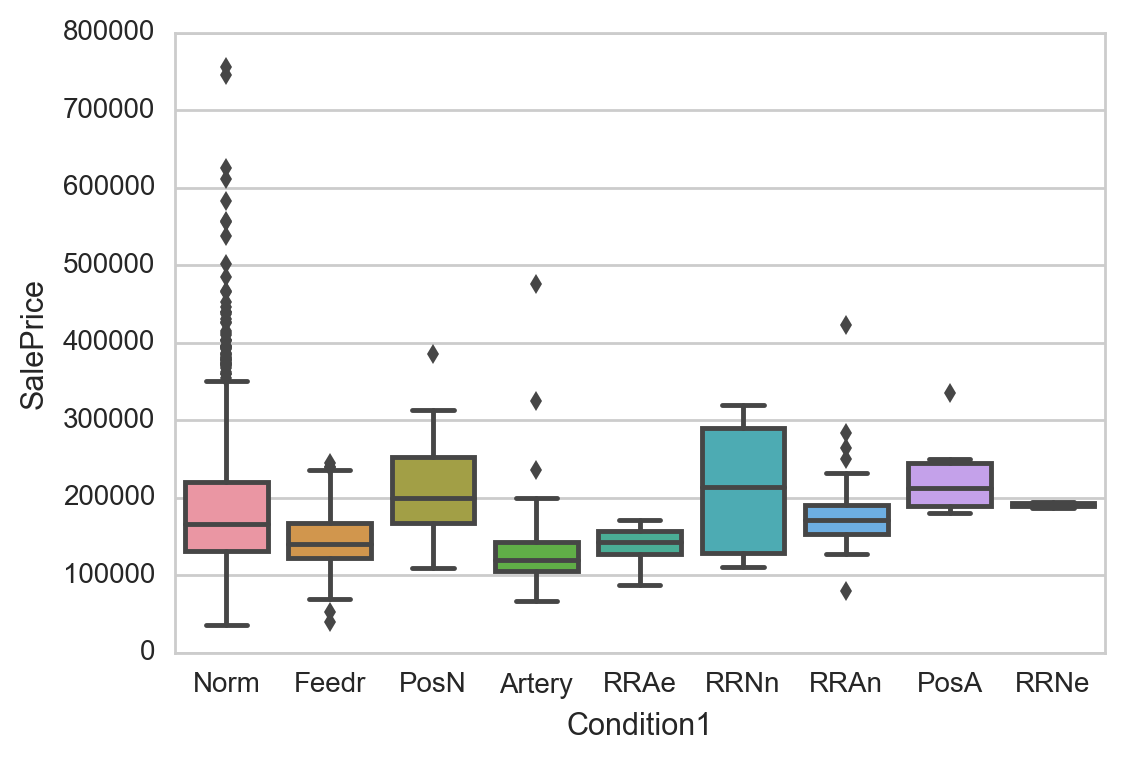

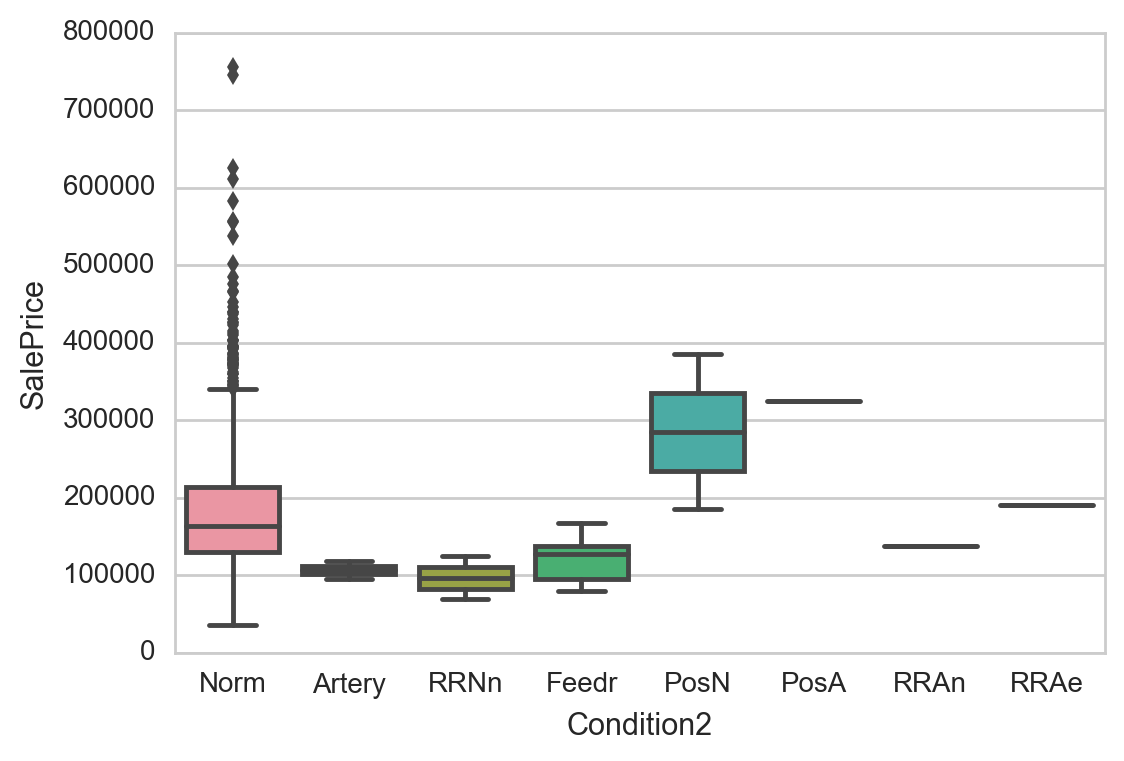

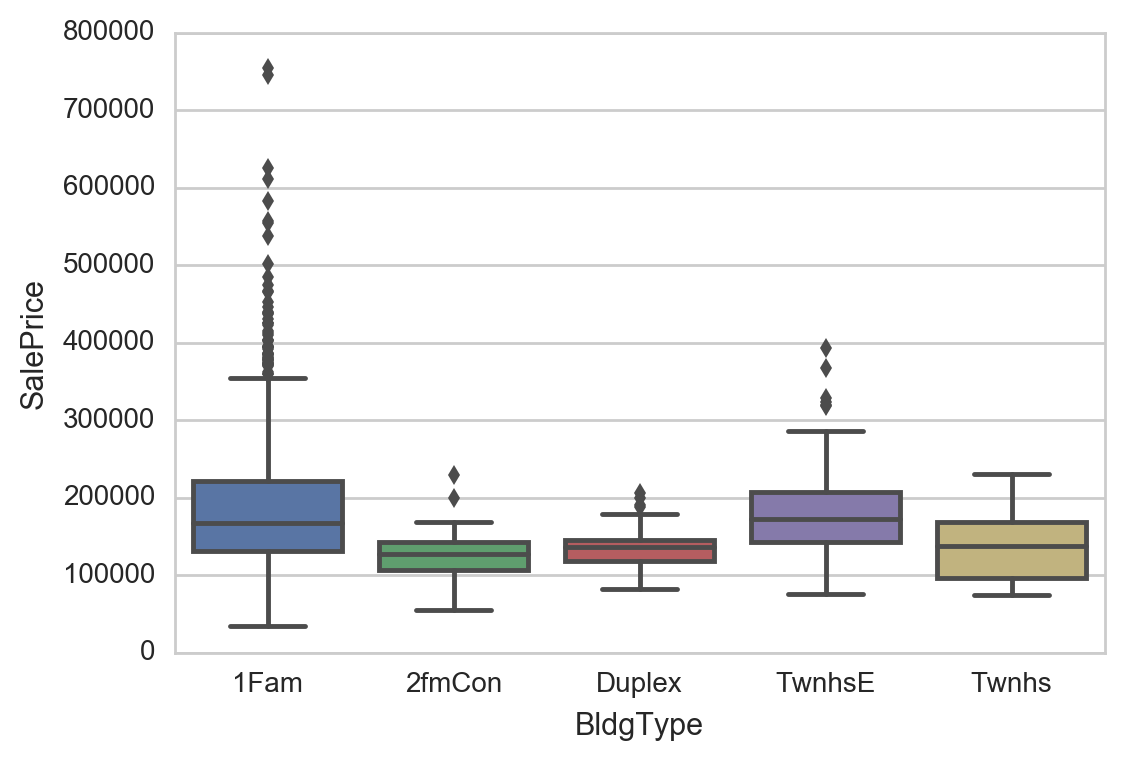

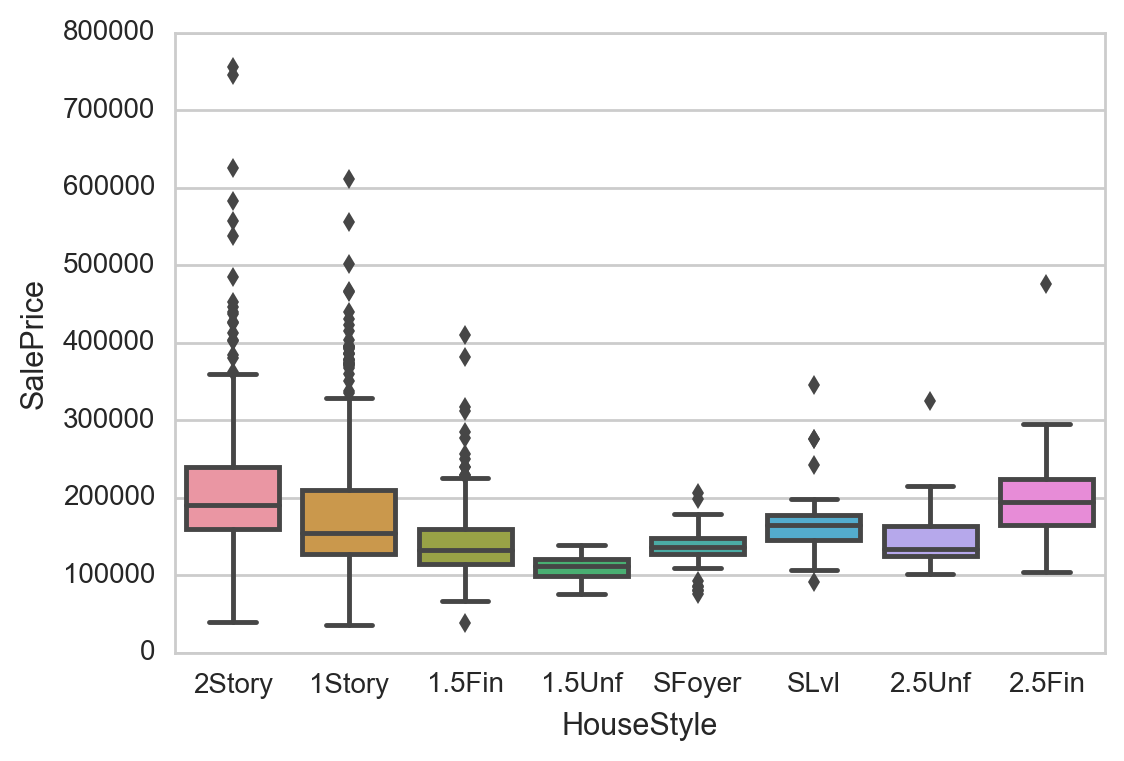

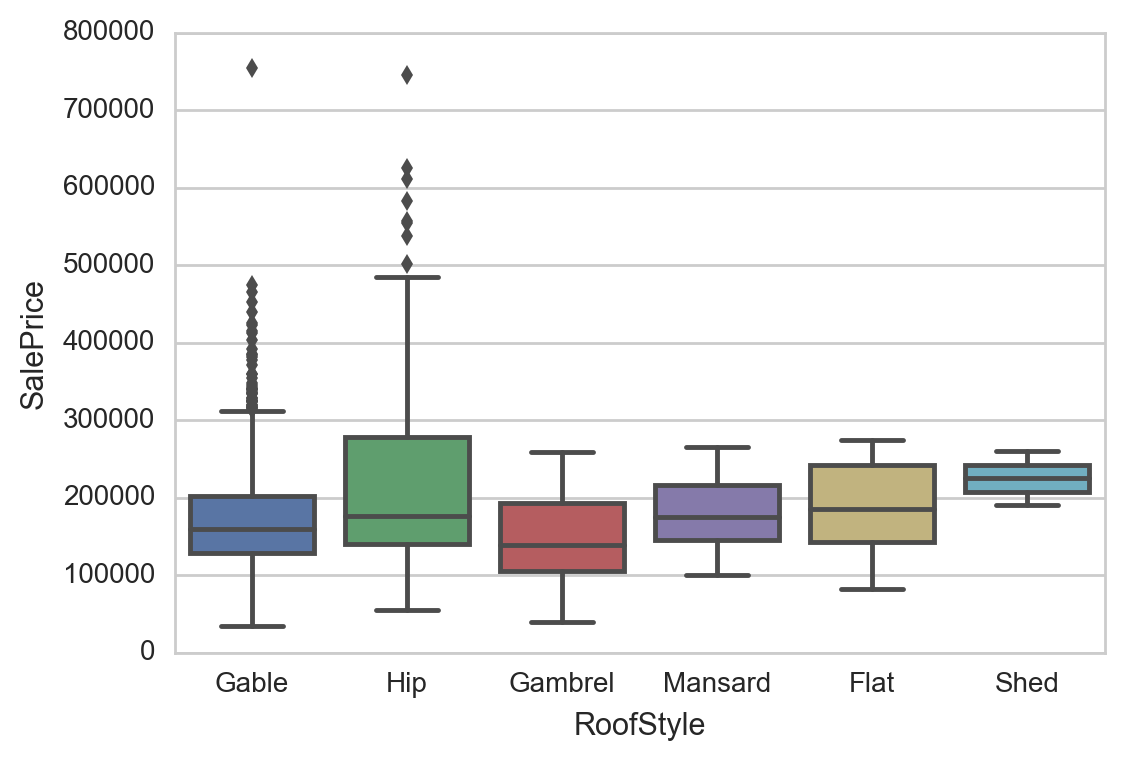

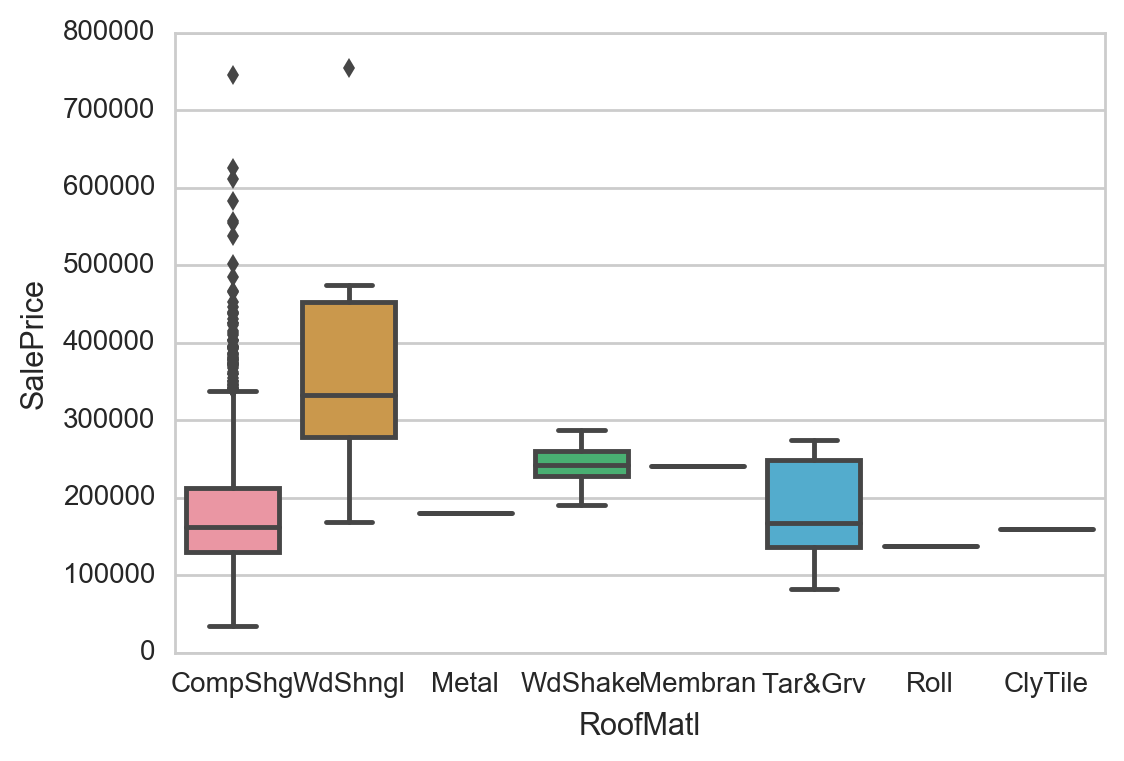

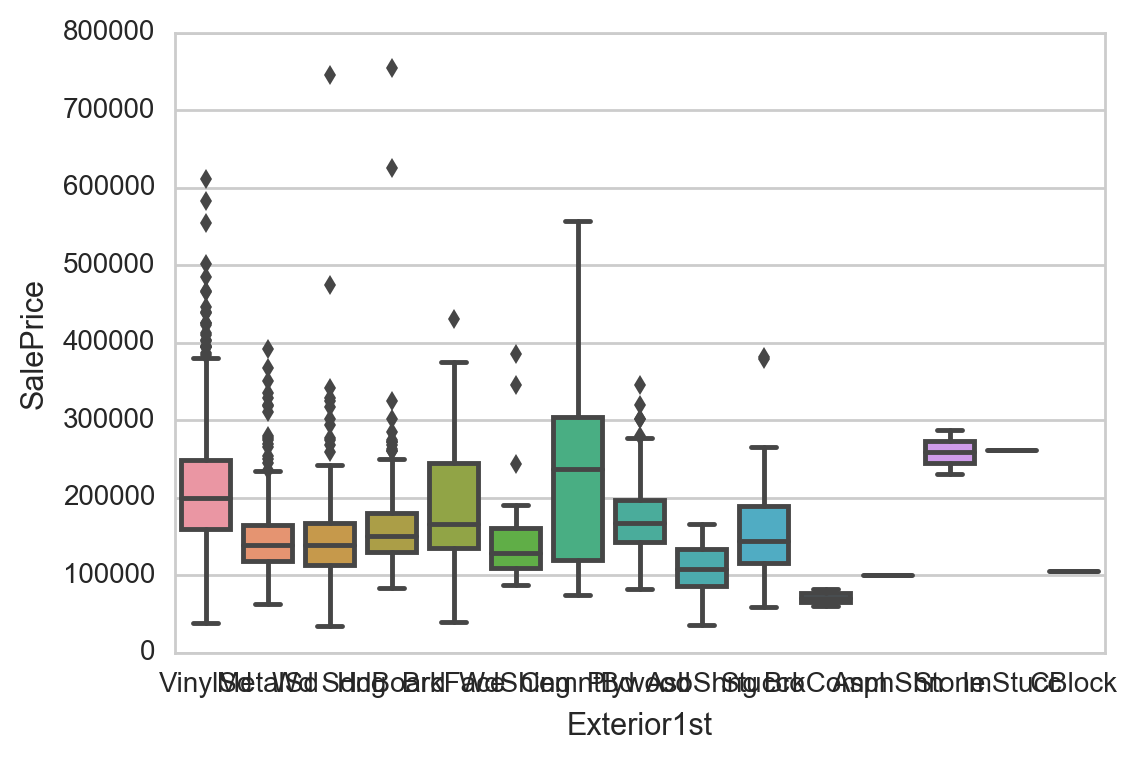

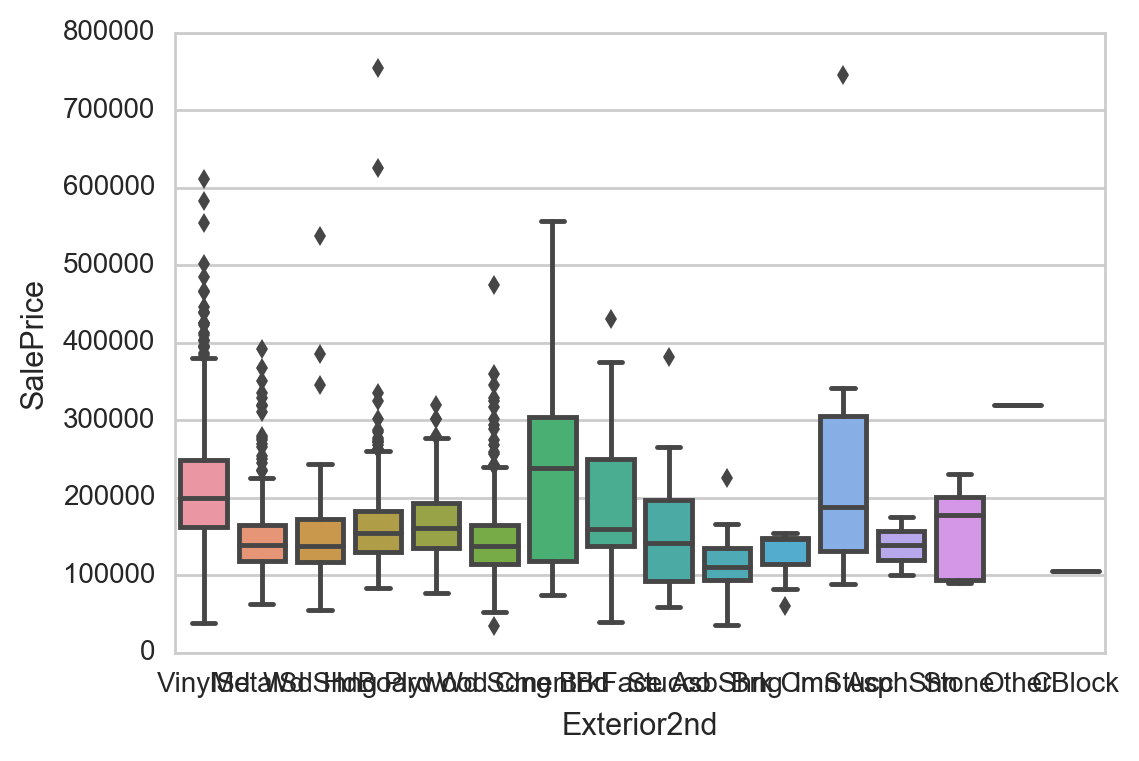

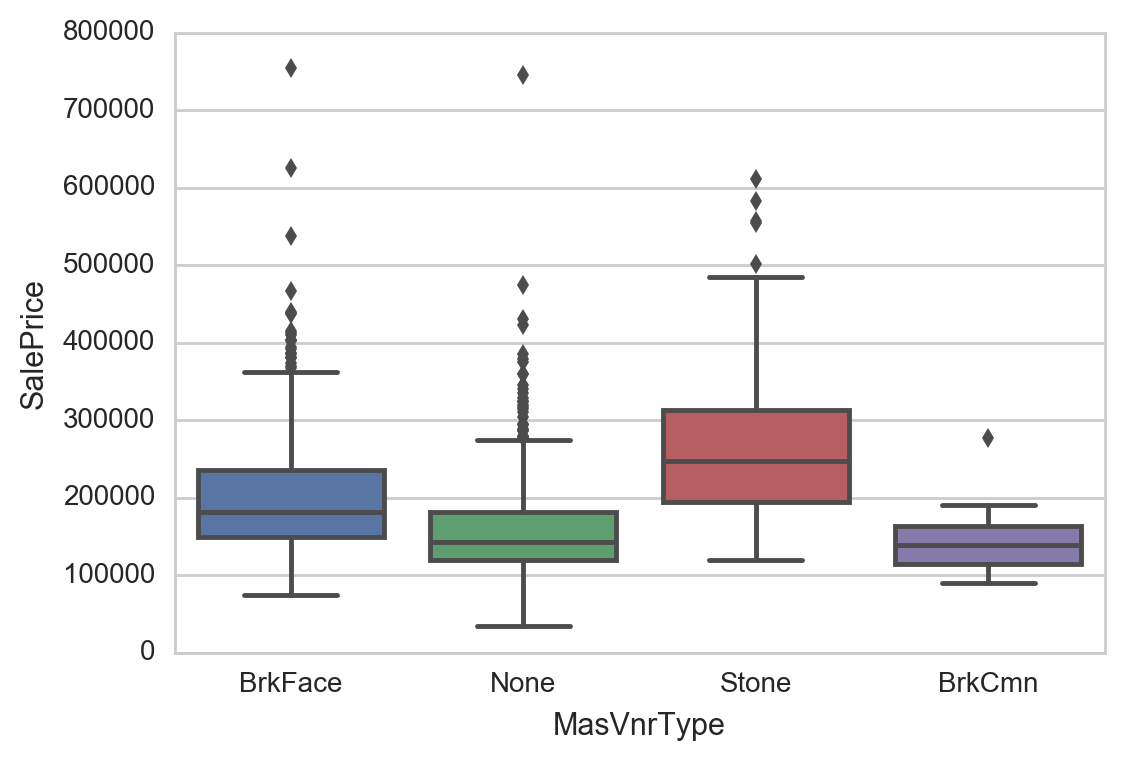

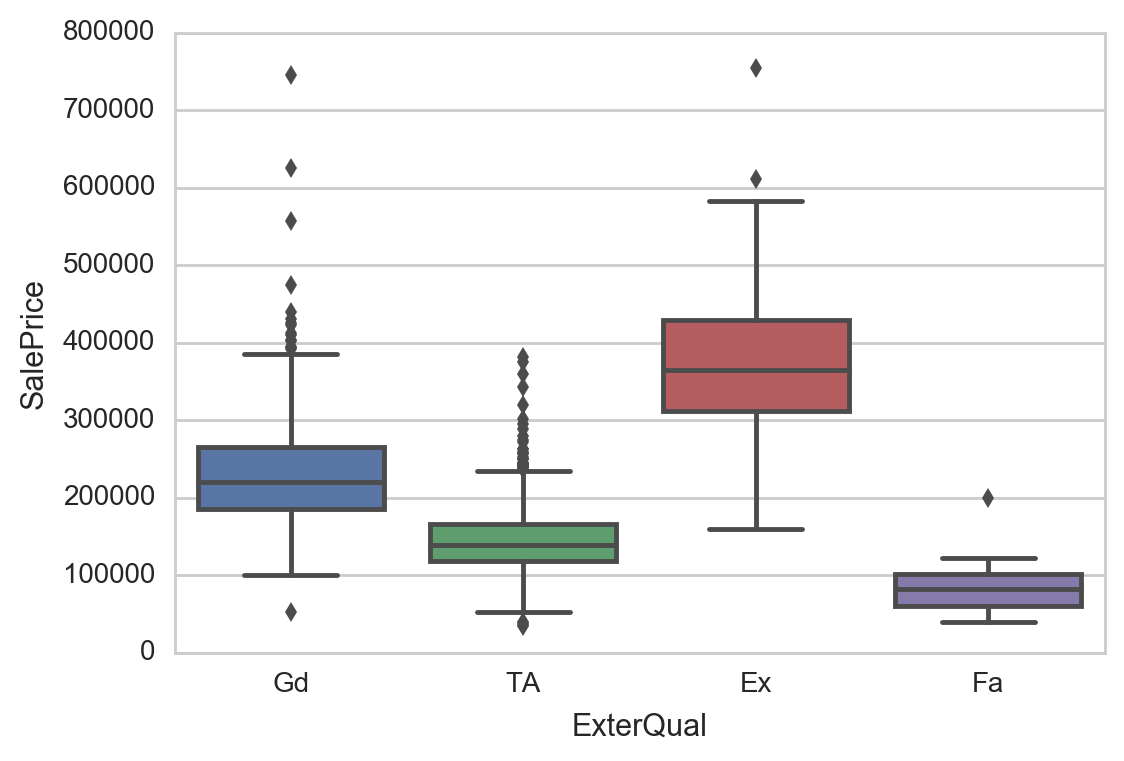

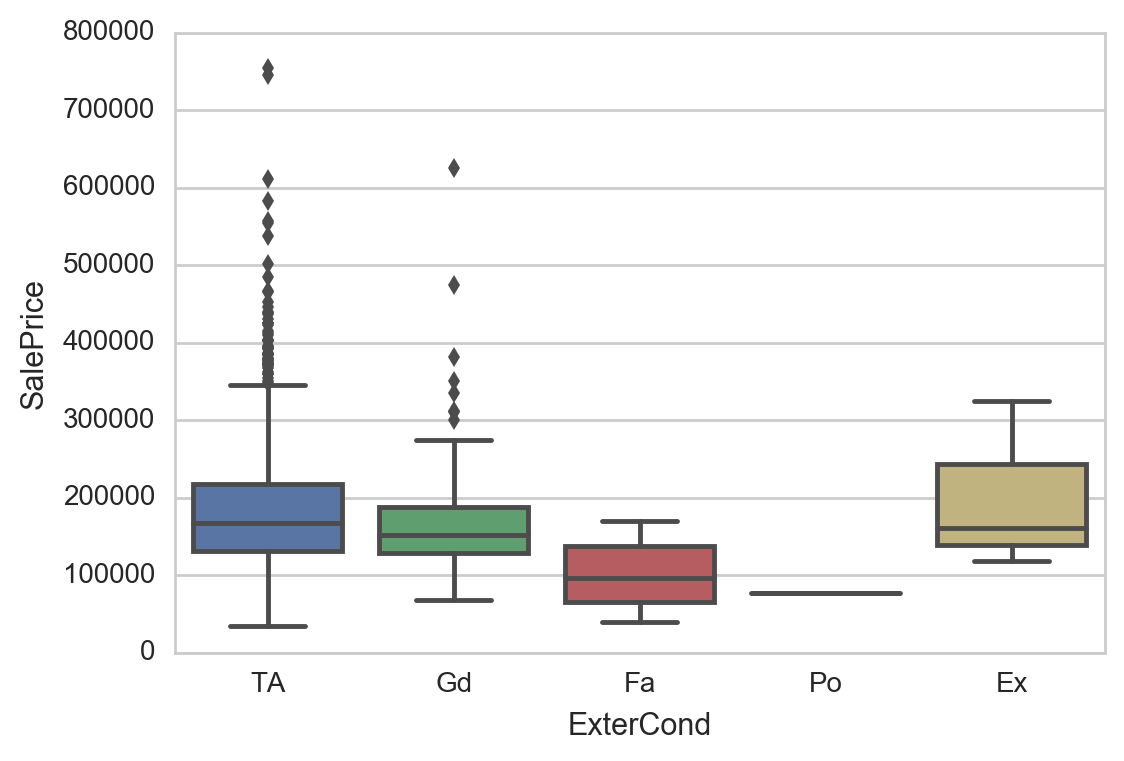

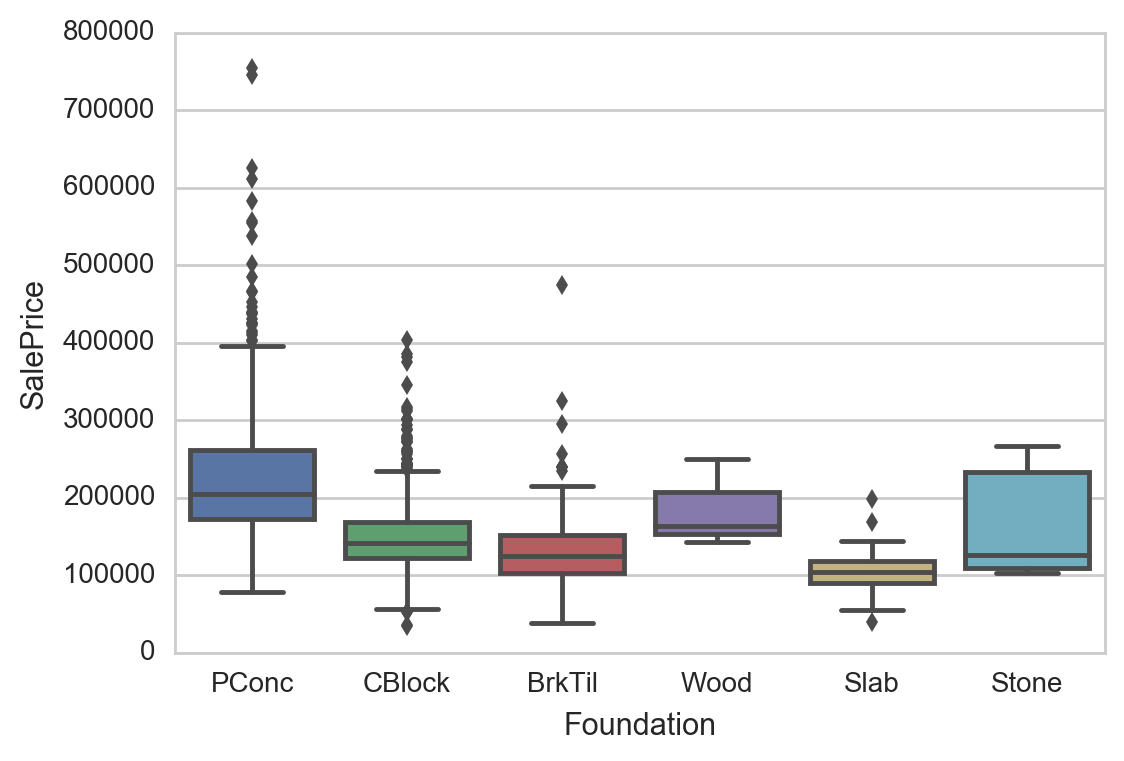

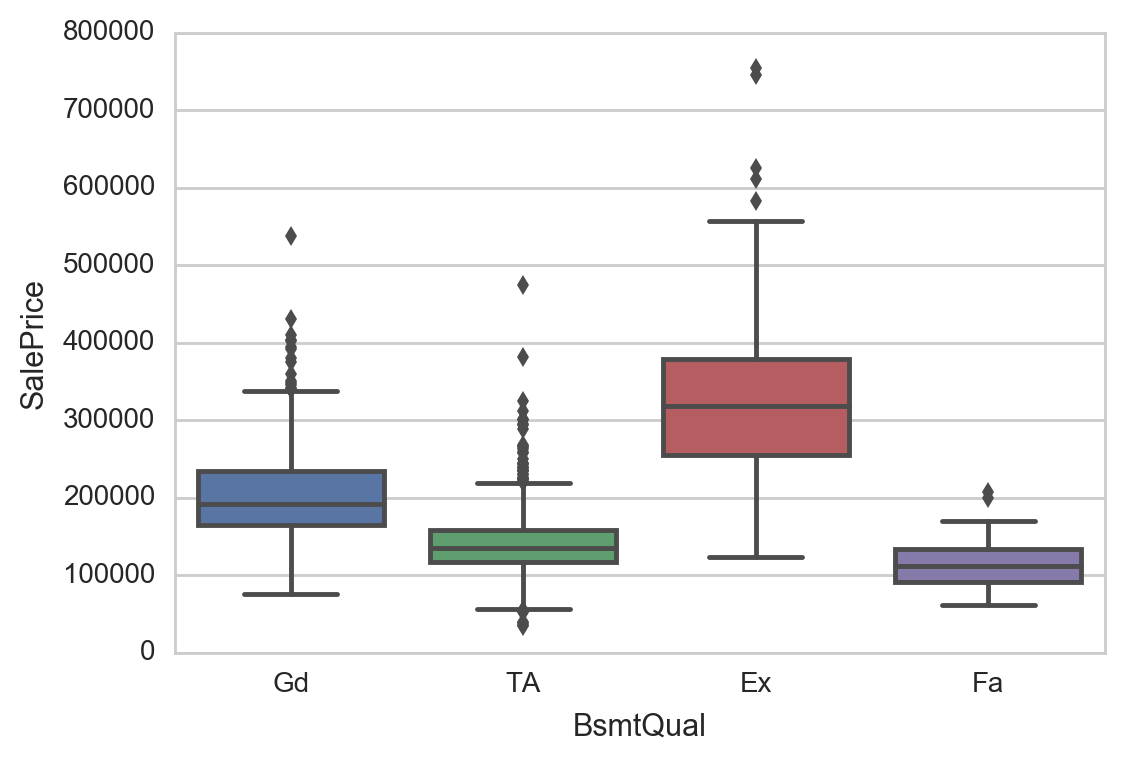

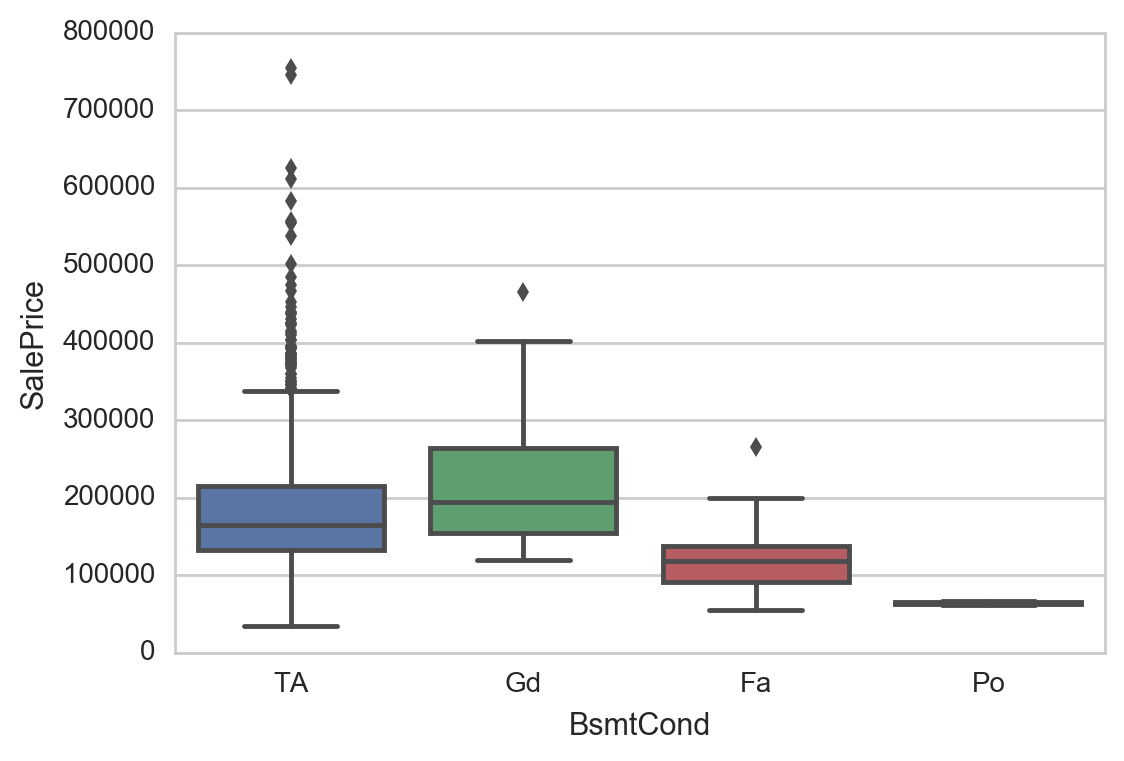

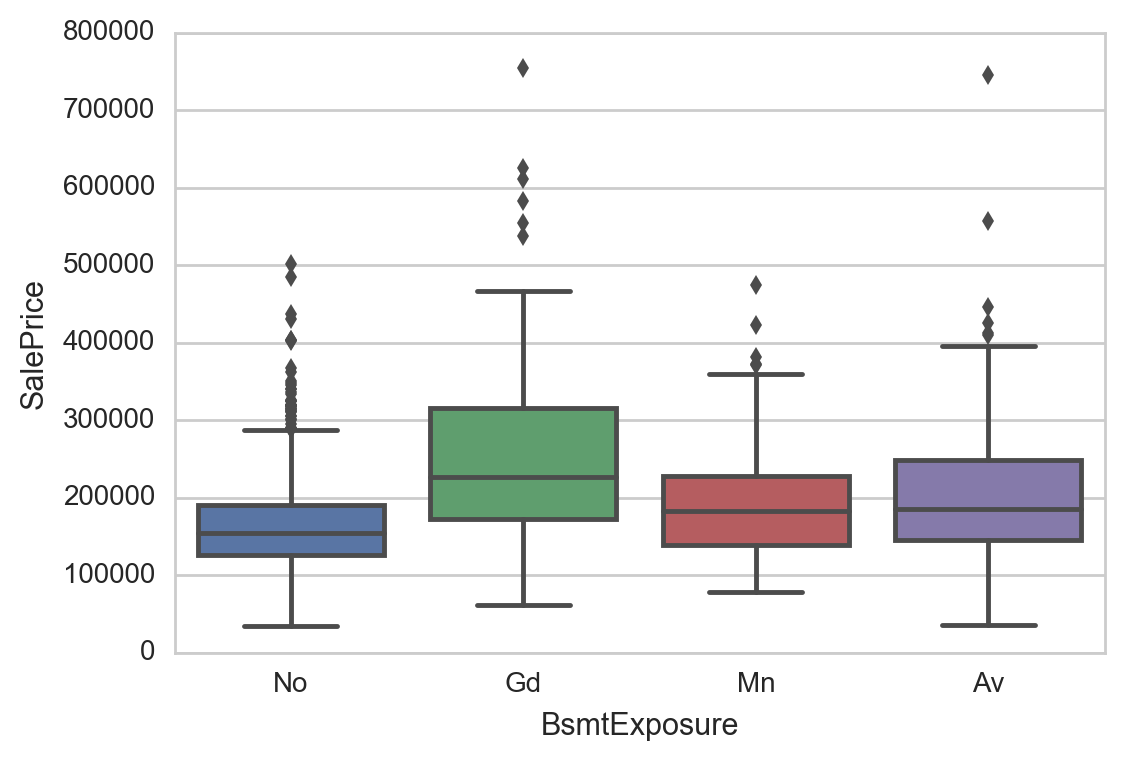

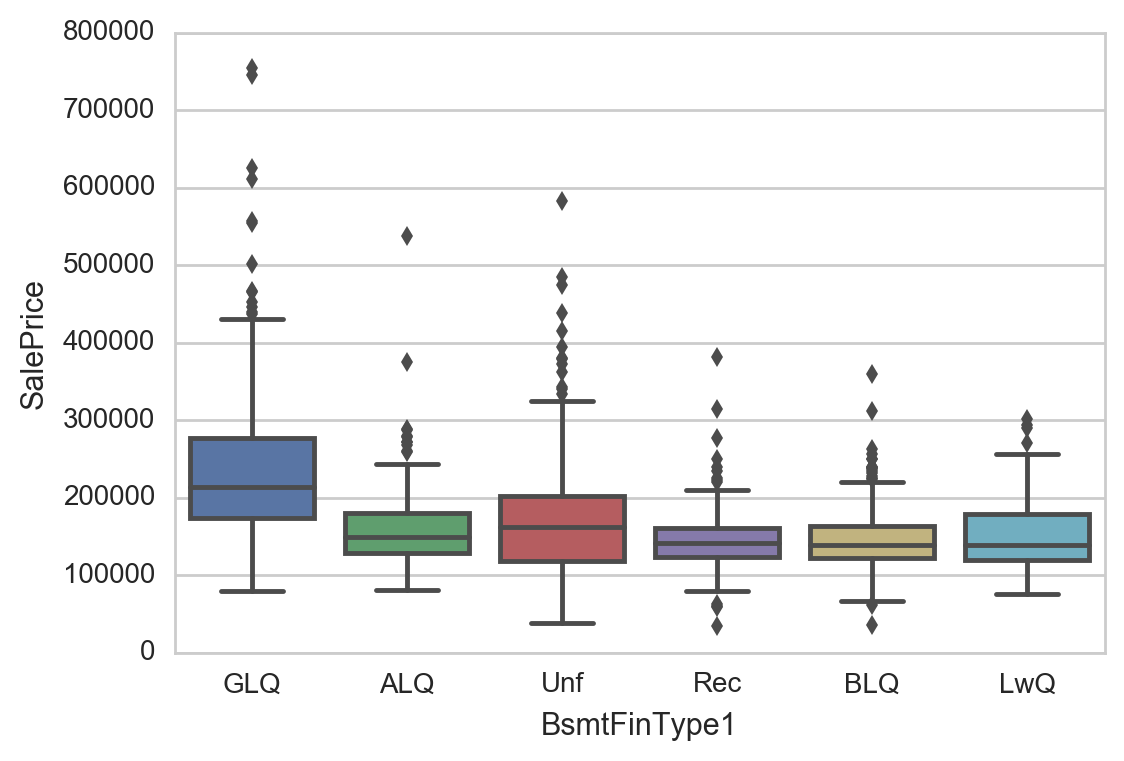

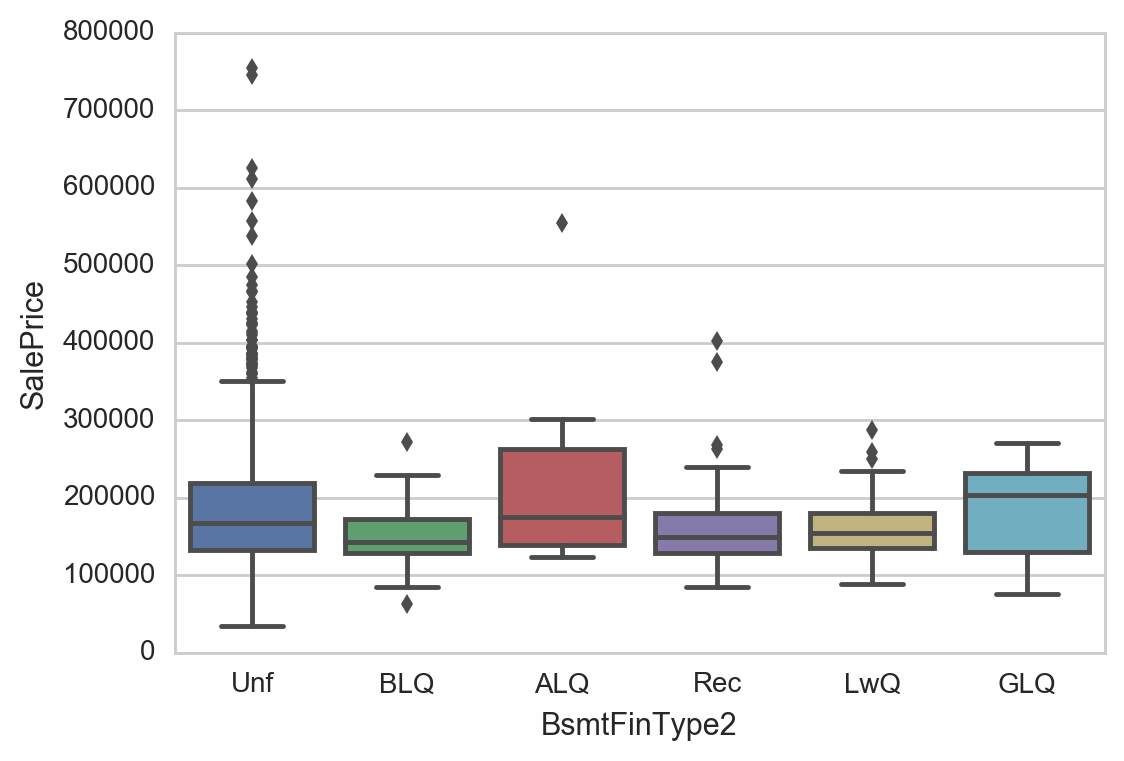

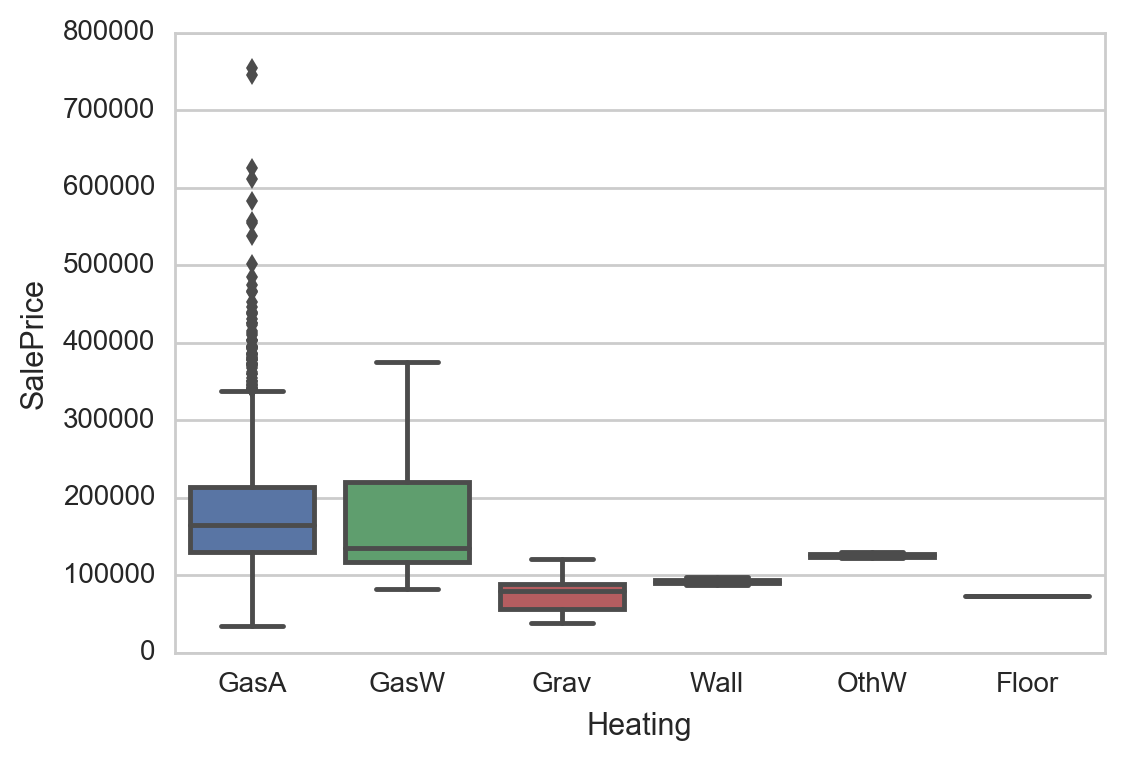

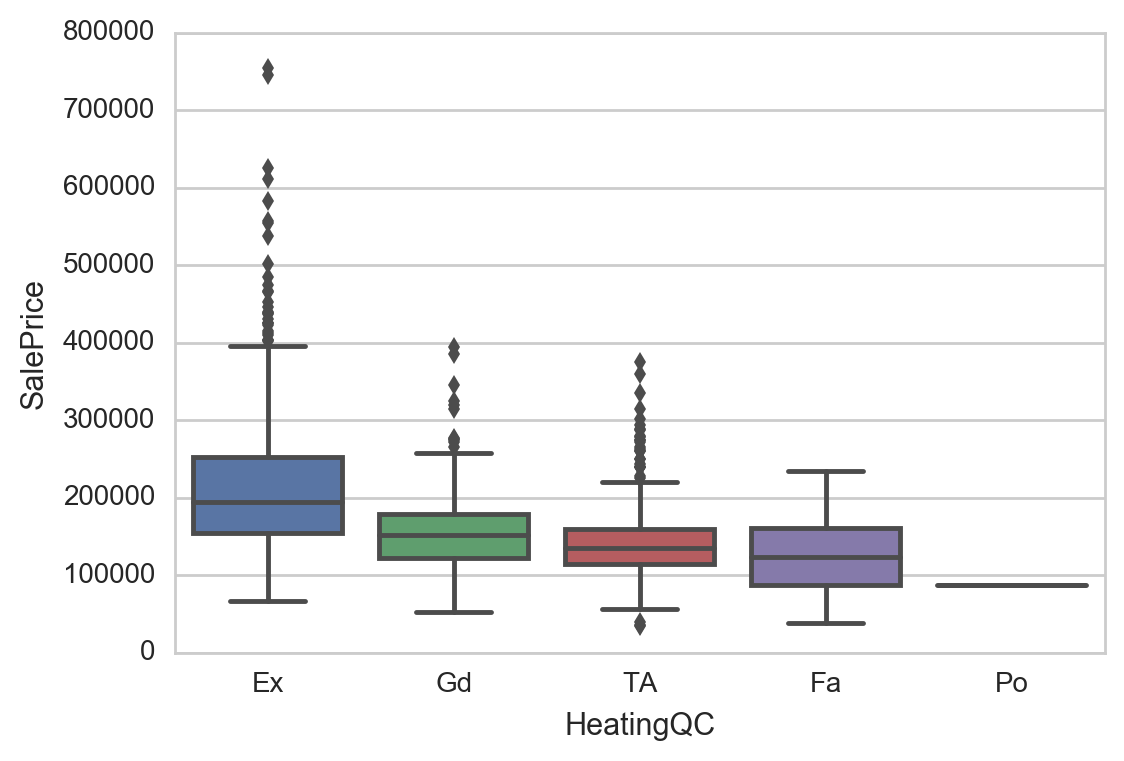

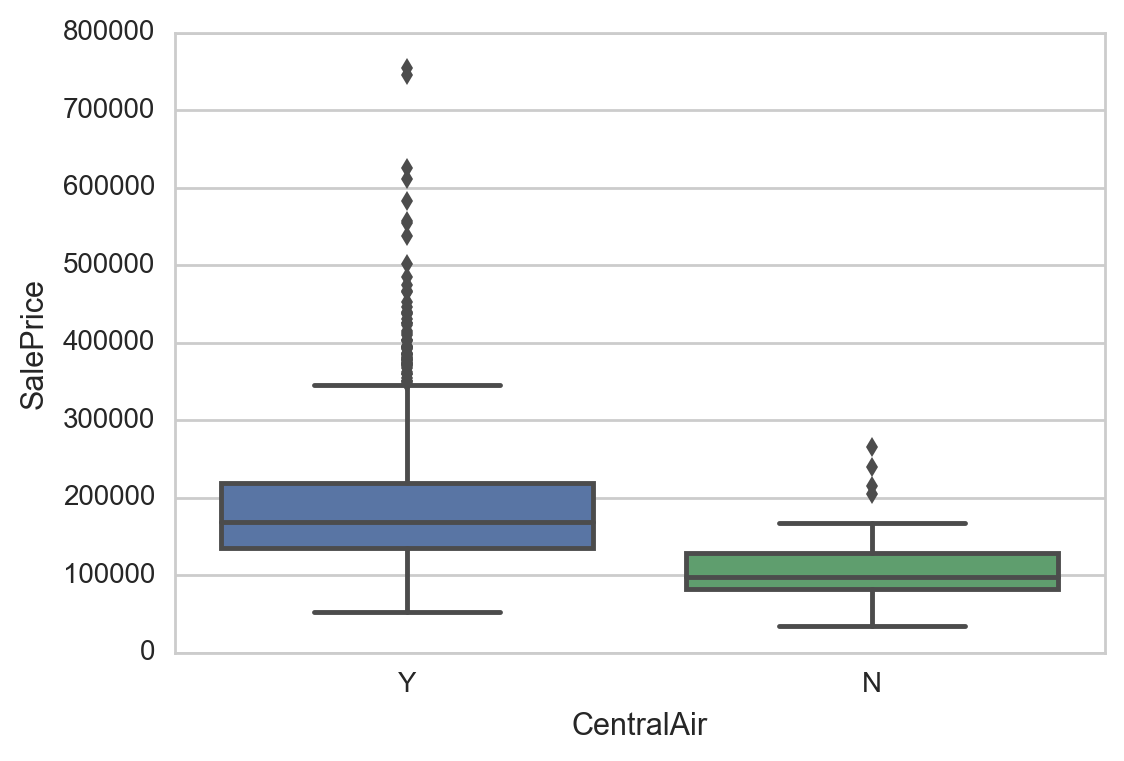

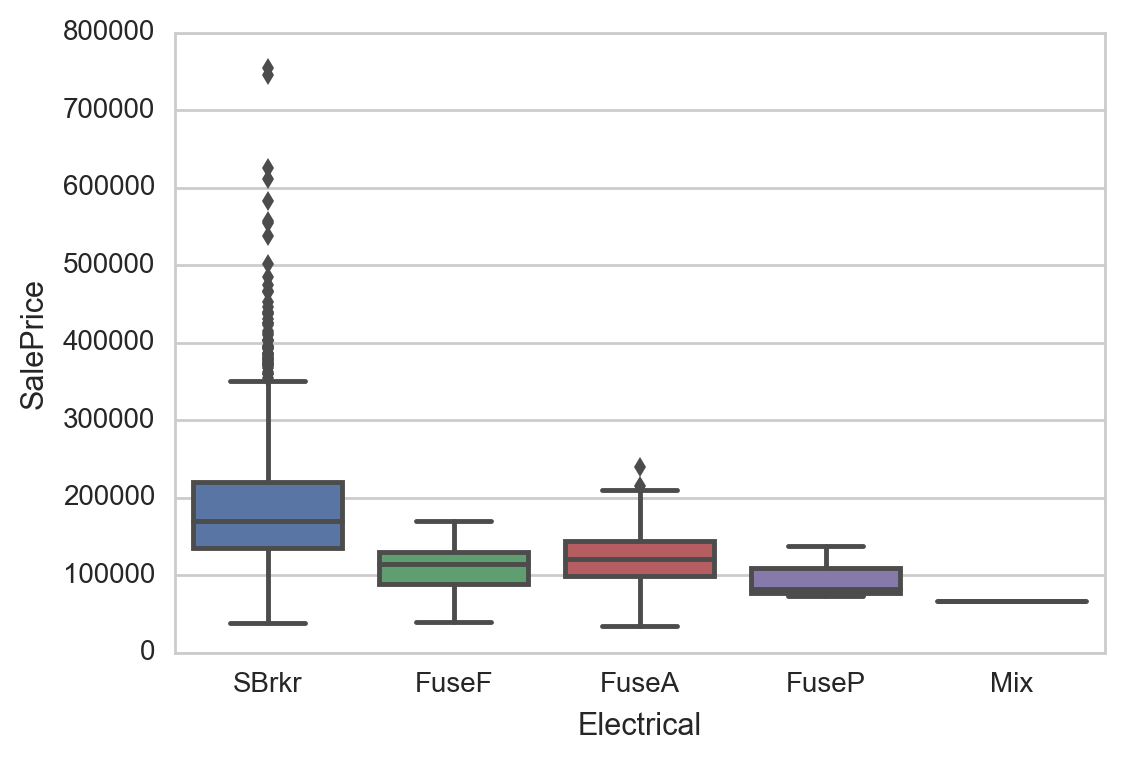

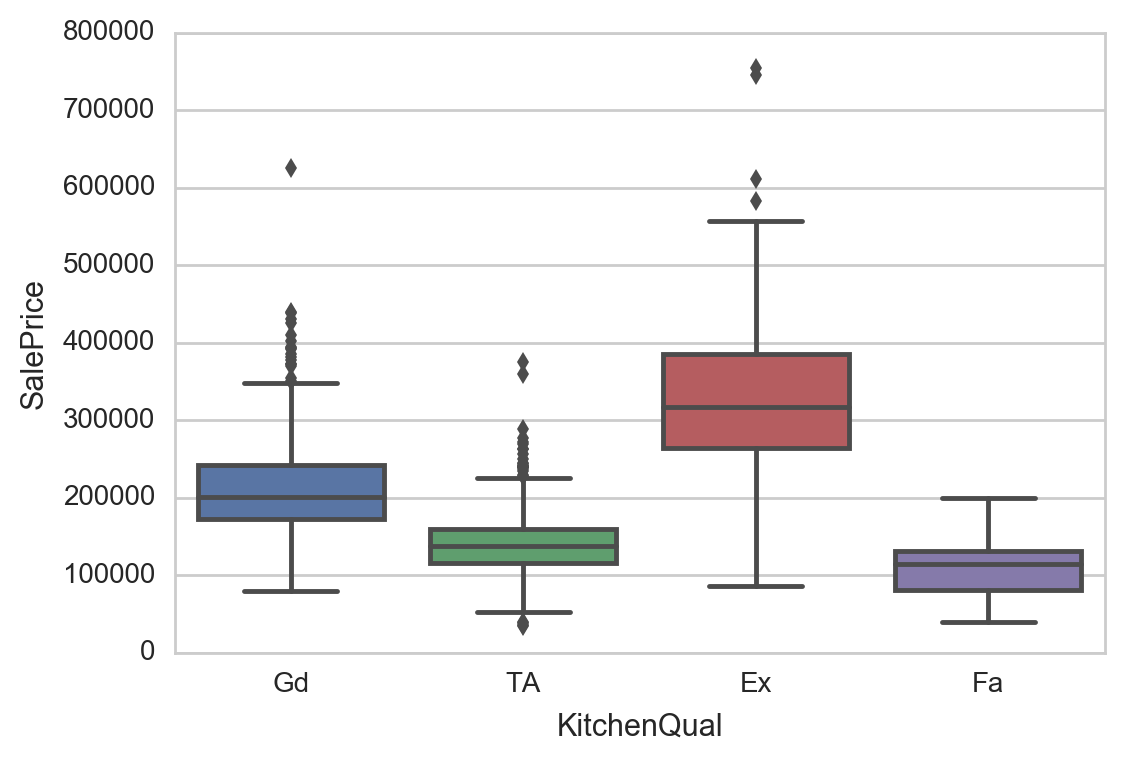

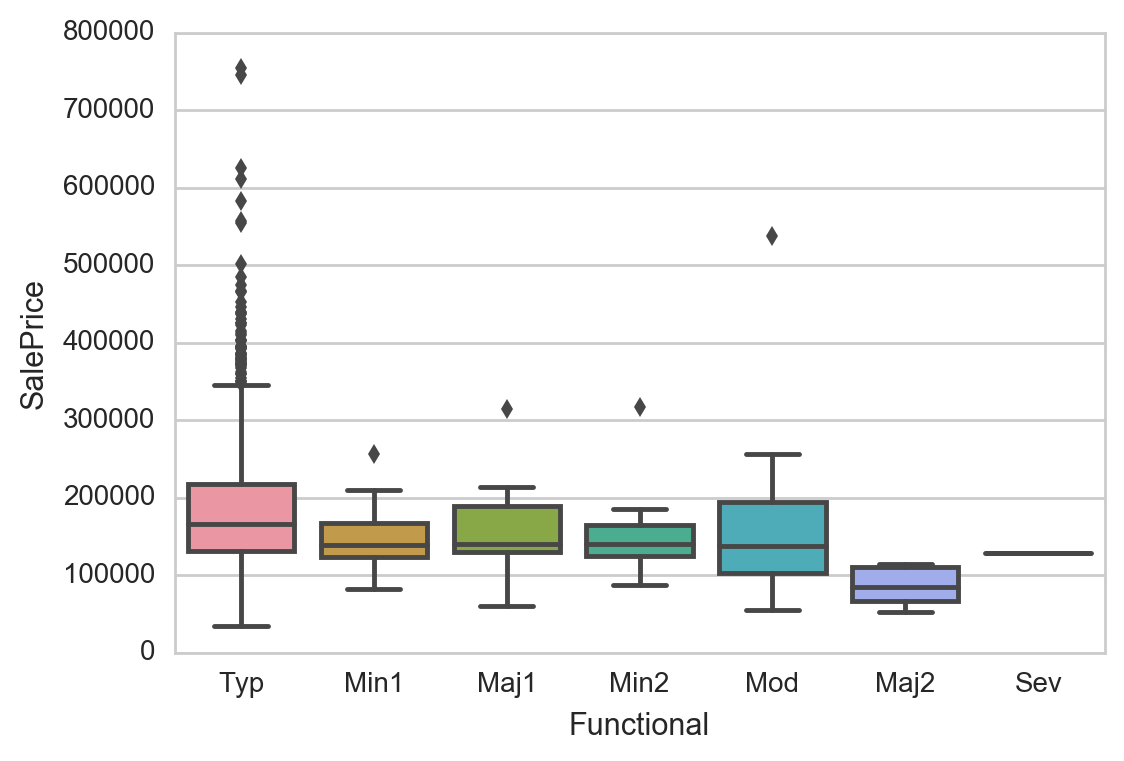

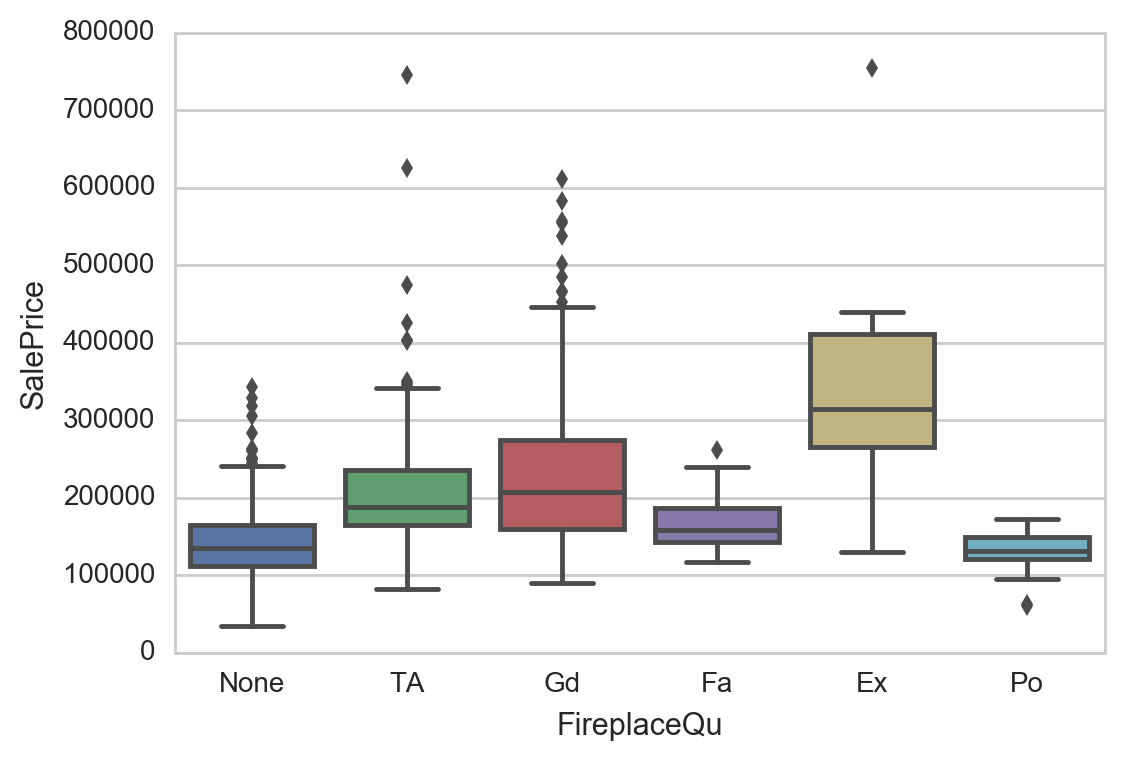

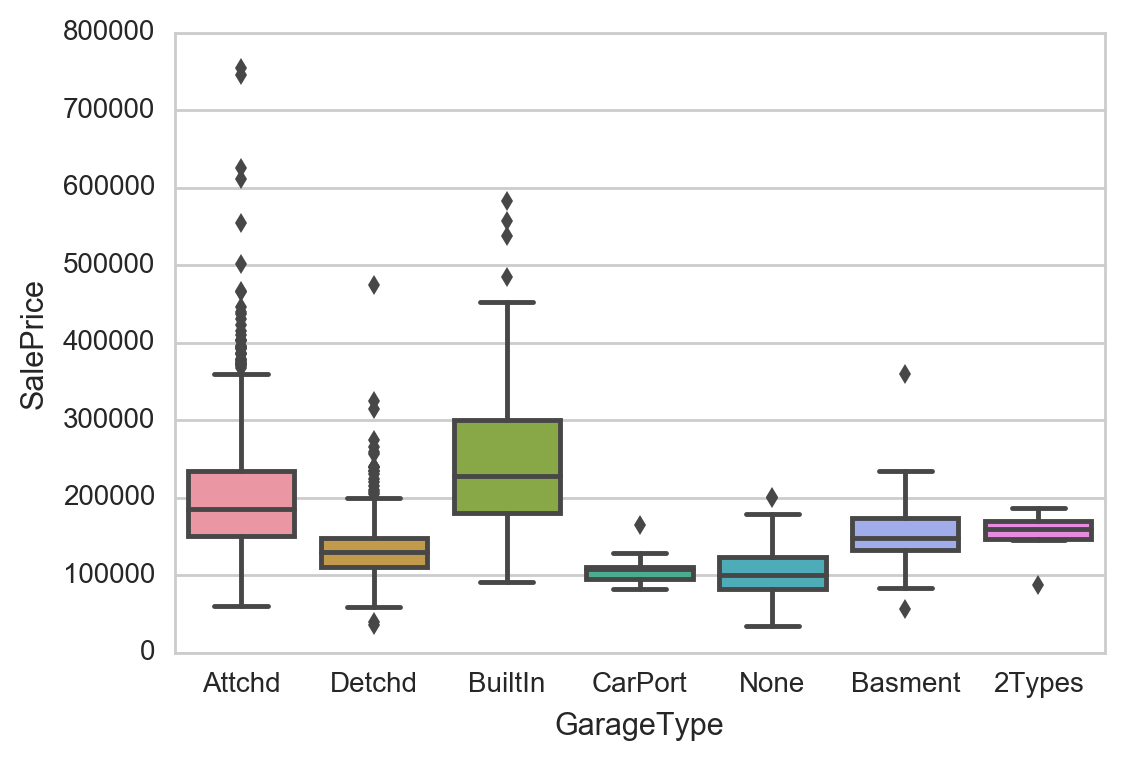

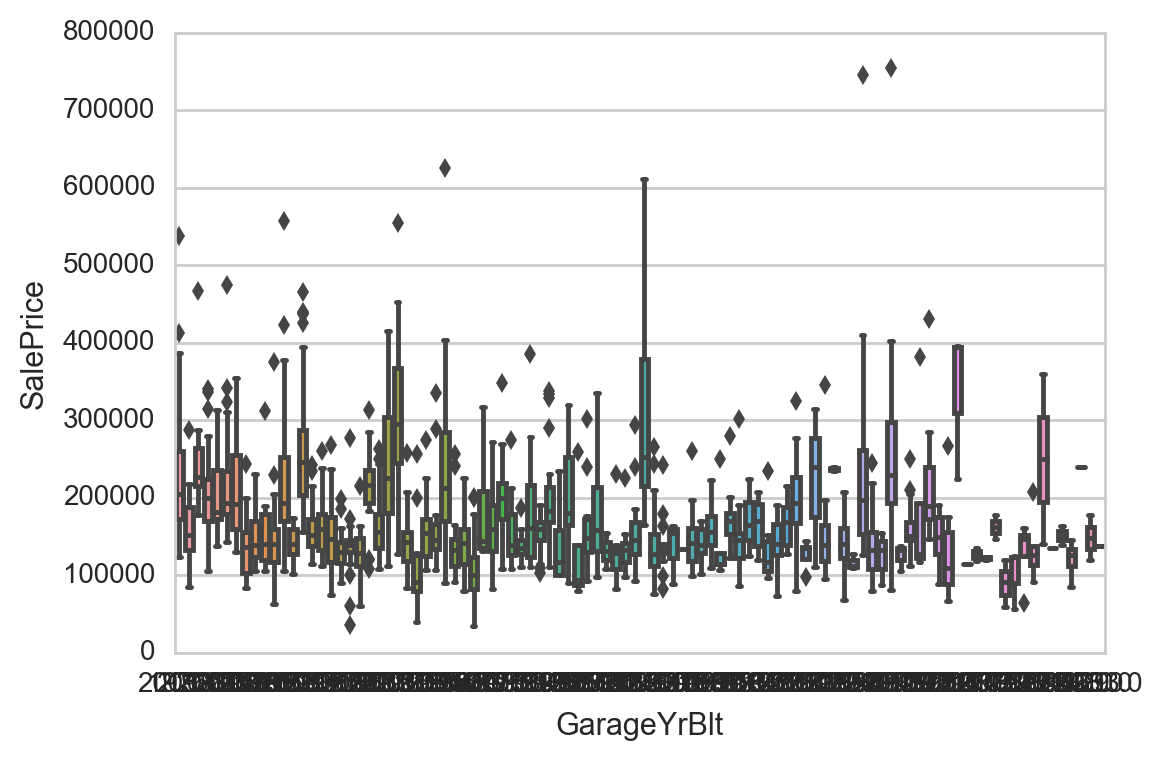

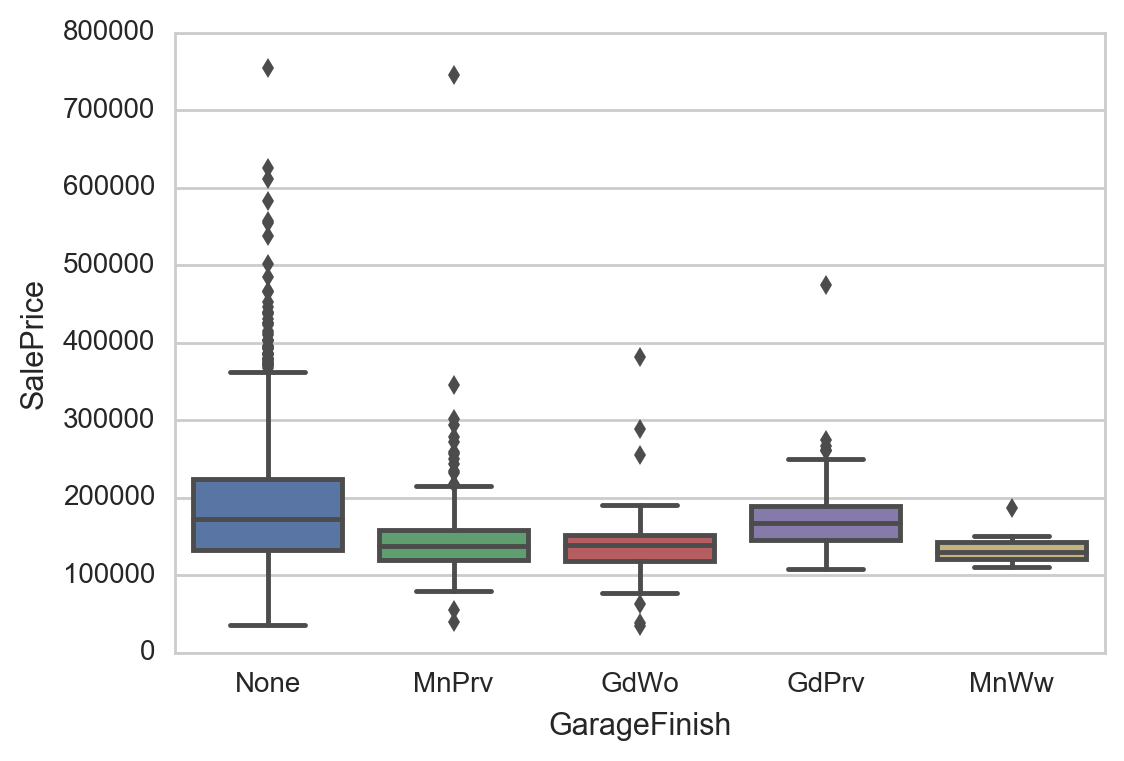

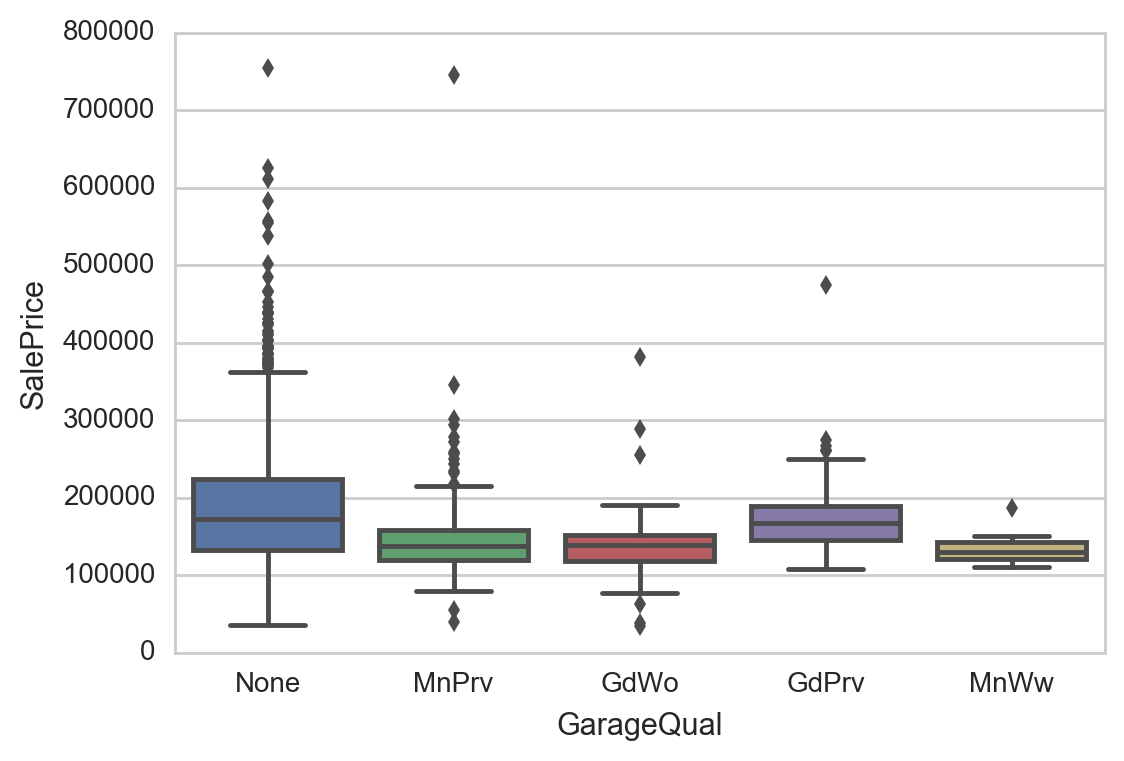

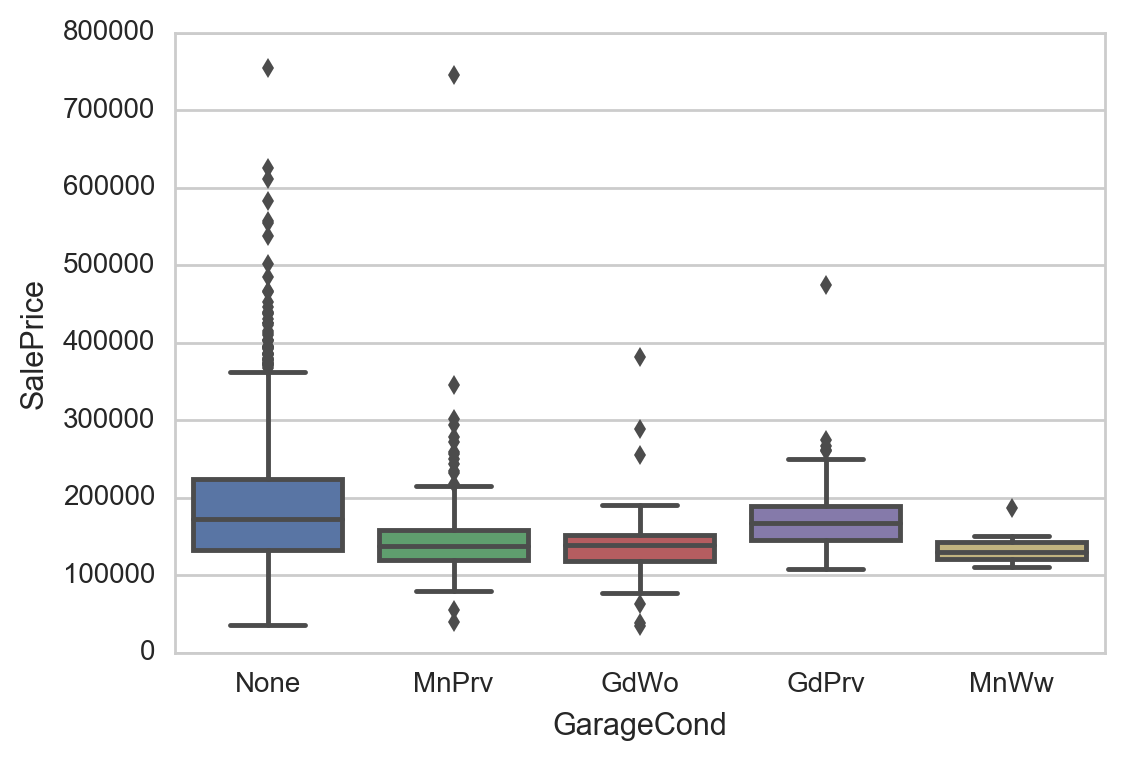

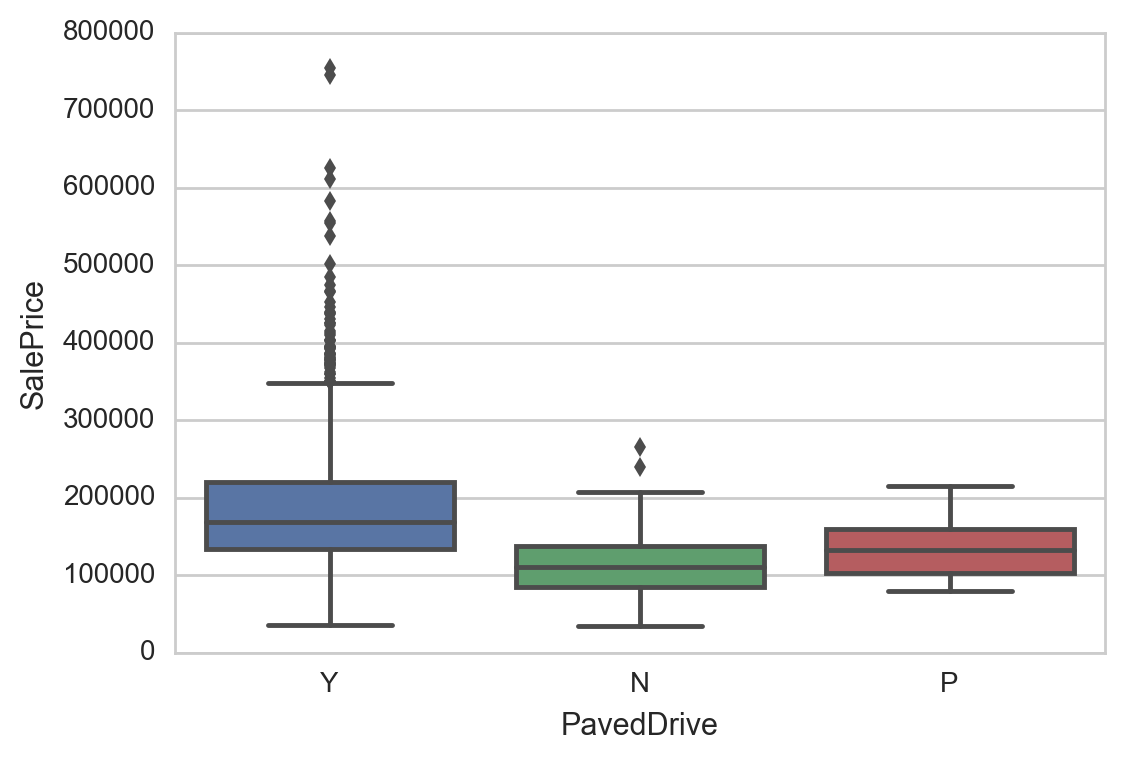

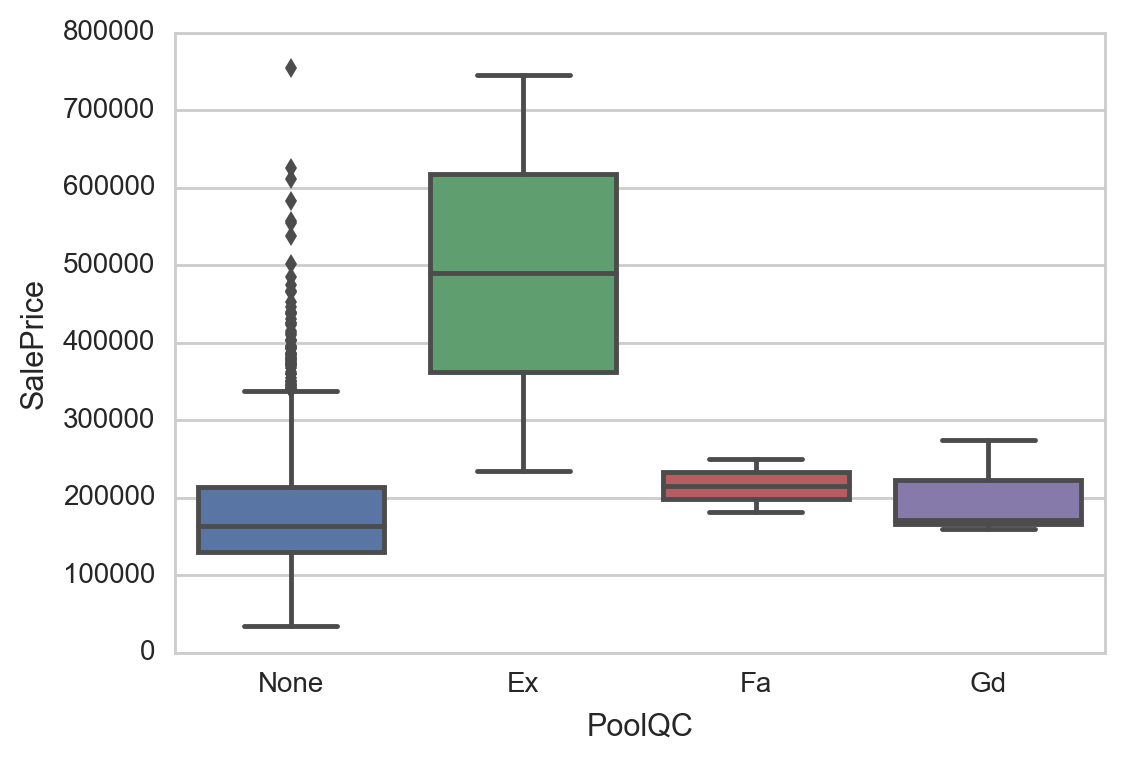

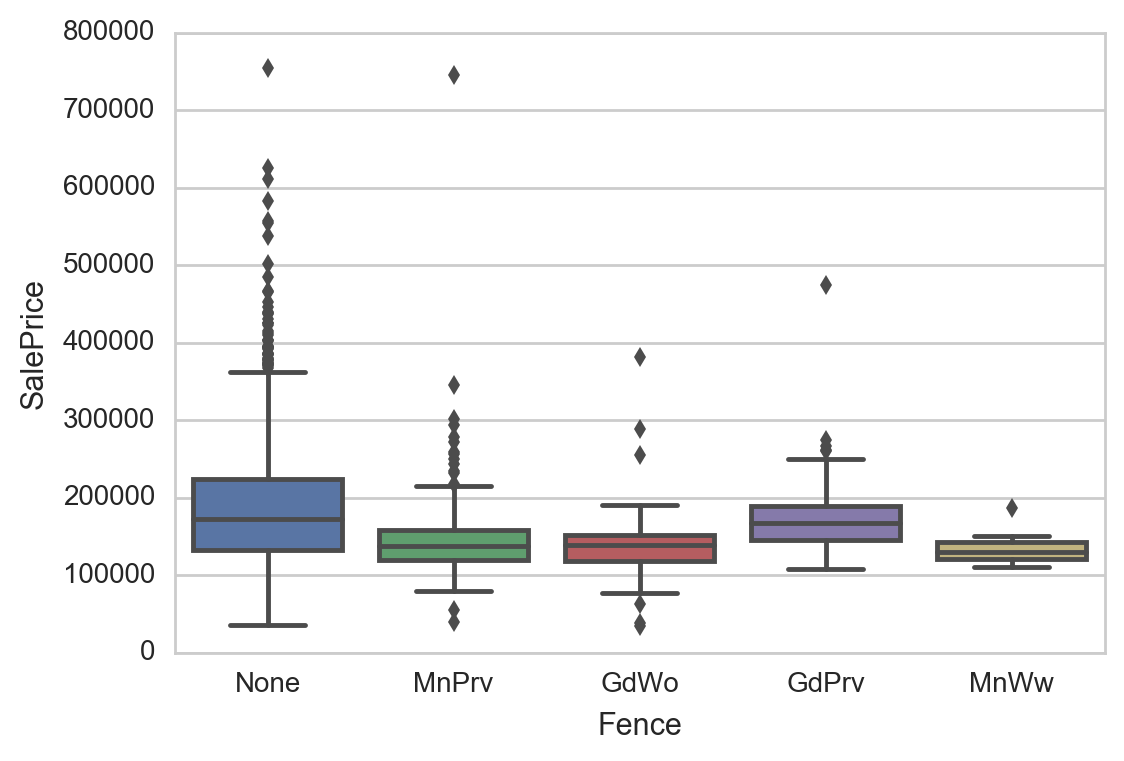

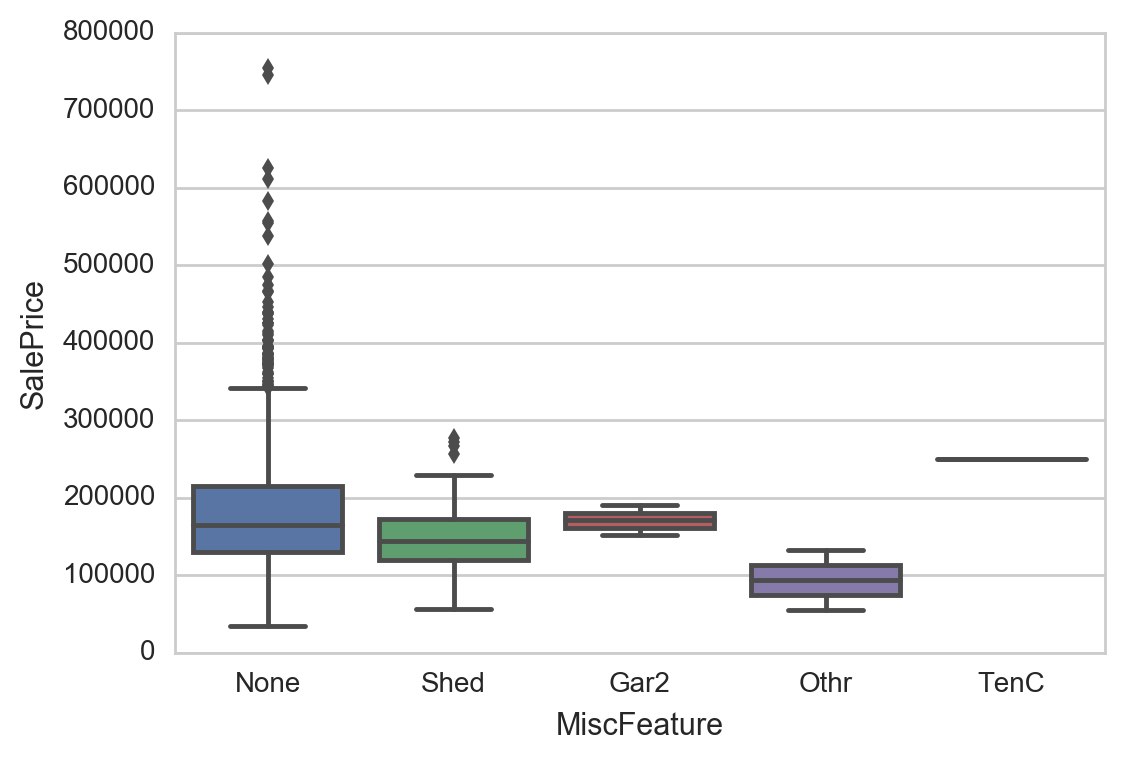

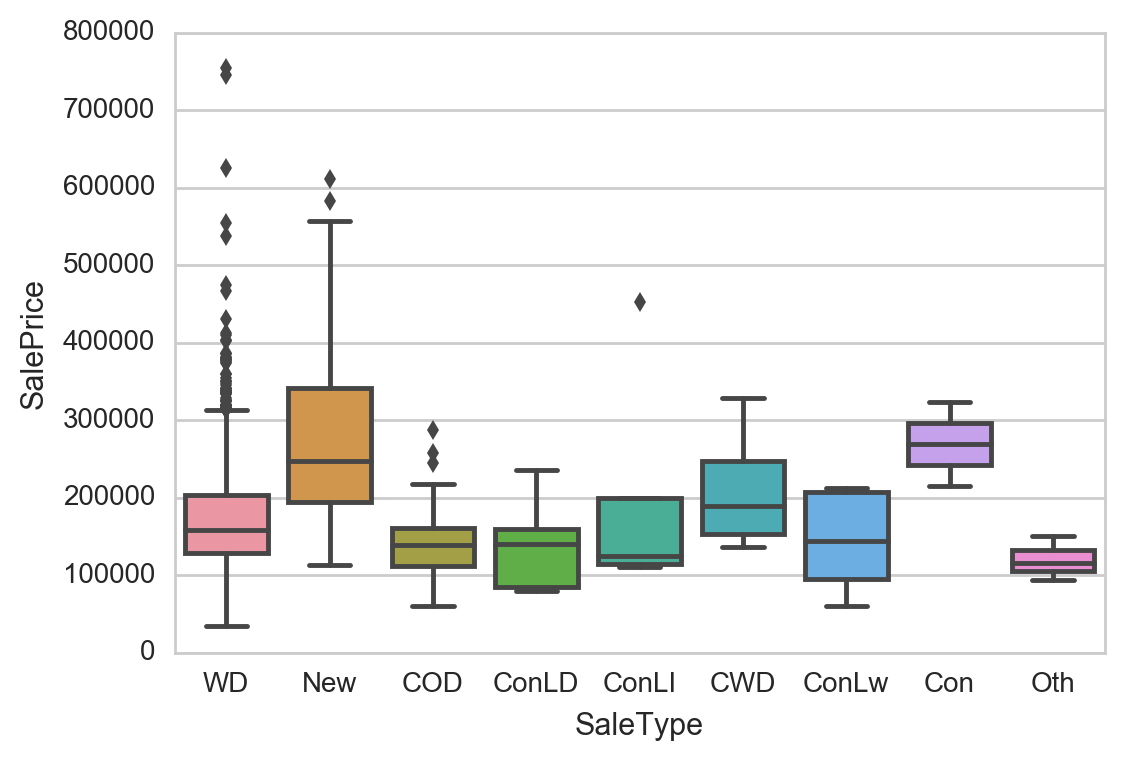

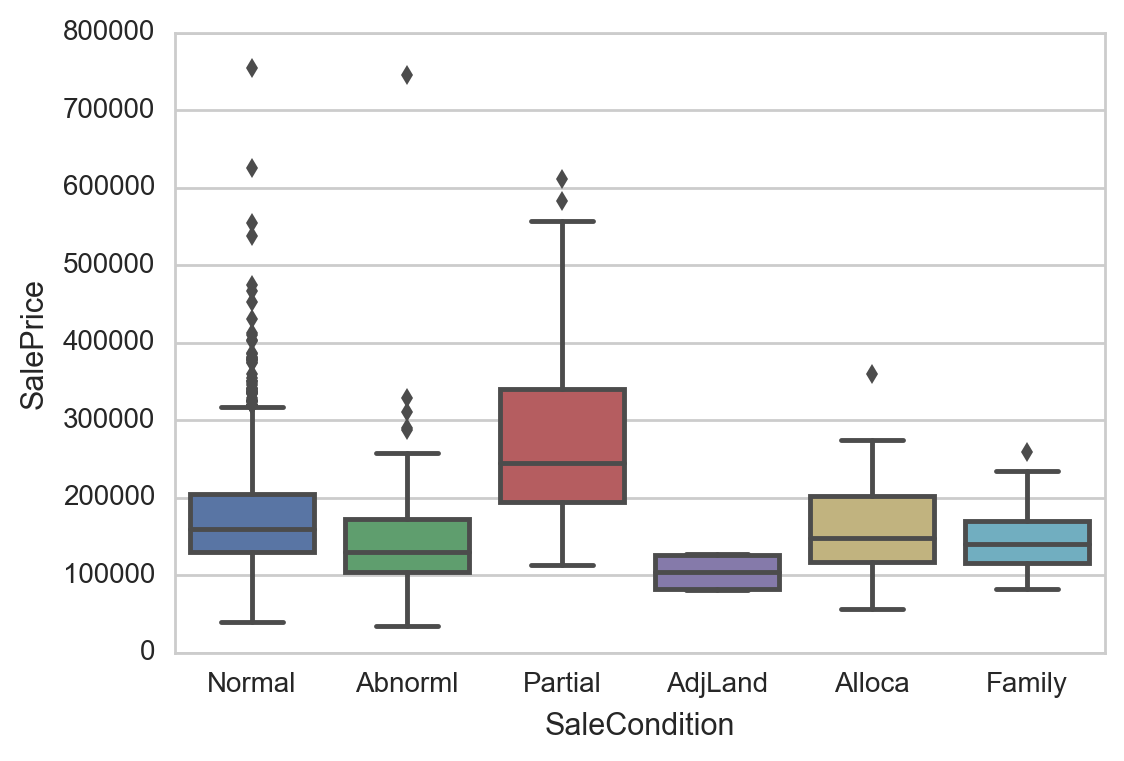

In [54]:
categorical_columns = house.select_dtypes(include=['object']).columns.values
for col in categorical_columns:
    sns.boxplot(data=house, x=col, y='SalePrice')
    plt.show()
    
#varables related to qualtity seem to be partocularly usefull.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


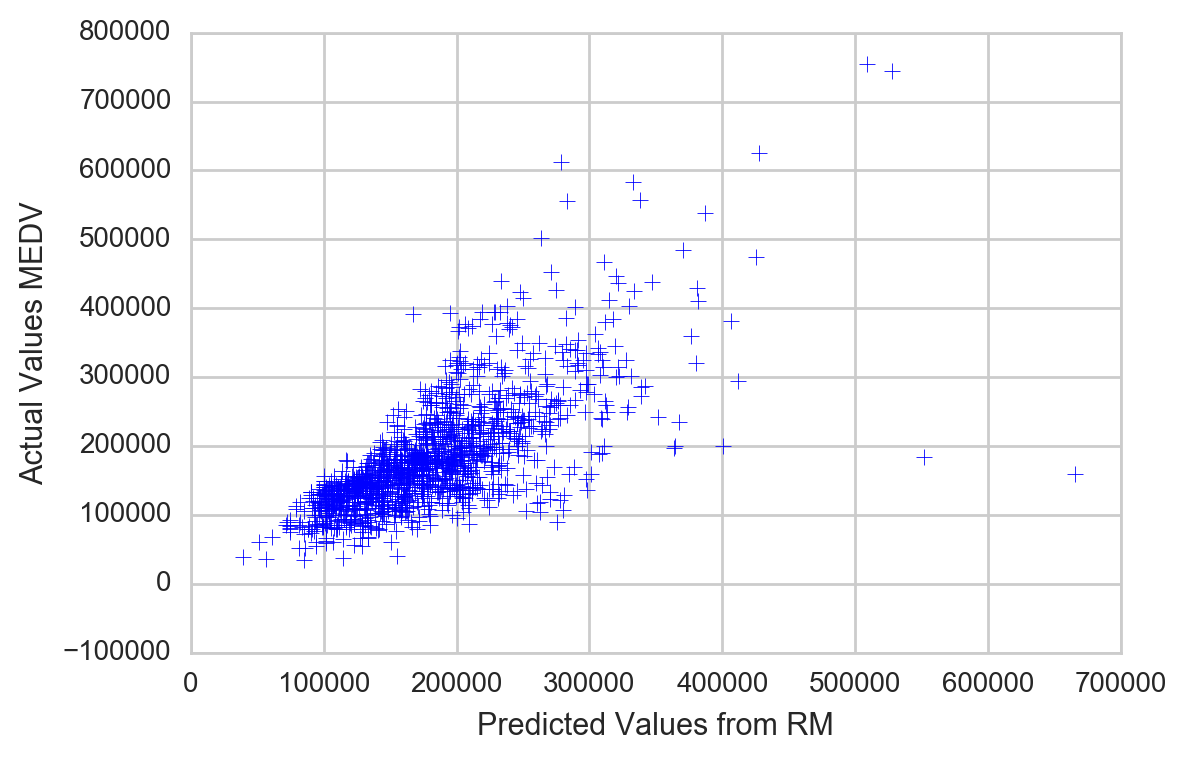

MSE: 3153196258.22


In [85]:
import statsmodels.api as sm

X = house_full['GrLivArea']
y = SalePrice

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='b', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()


print "MSE:", mean_squared_error(y, predictions)



### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

In [ ]:
# The intercept coefficient.  a base staring value, as you reach 0 space you reach 0 cost.
# The coefficient on GrLivArea. the importance of GrLivArea in the modle 
# The R-squared value. not a bad colrolation
# The p-value for coefficients (P>|t|) i dont understand this.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


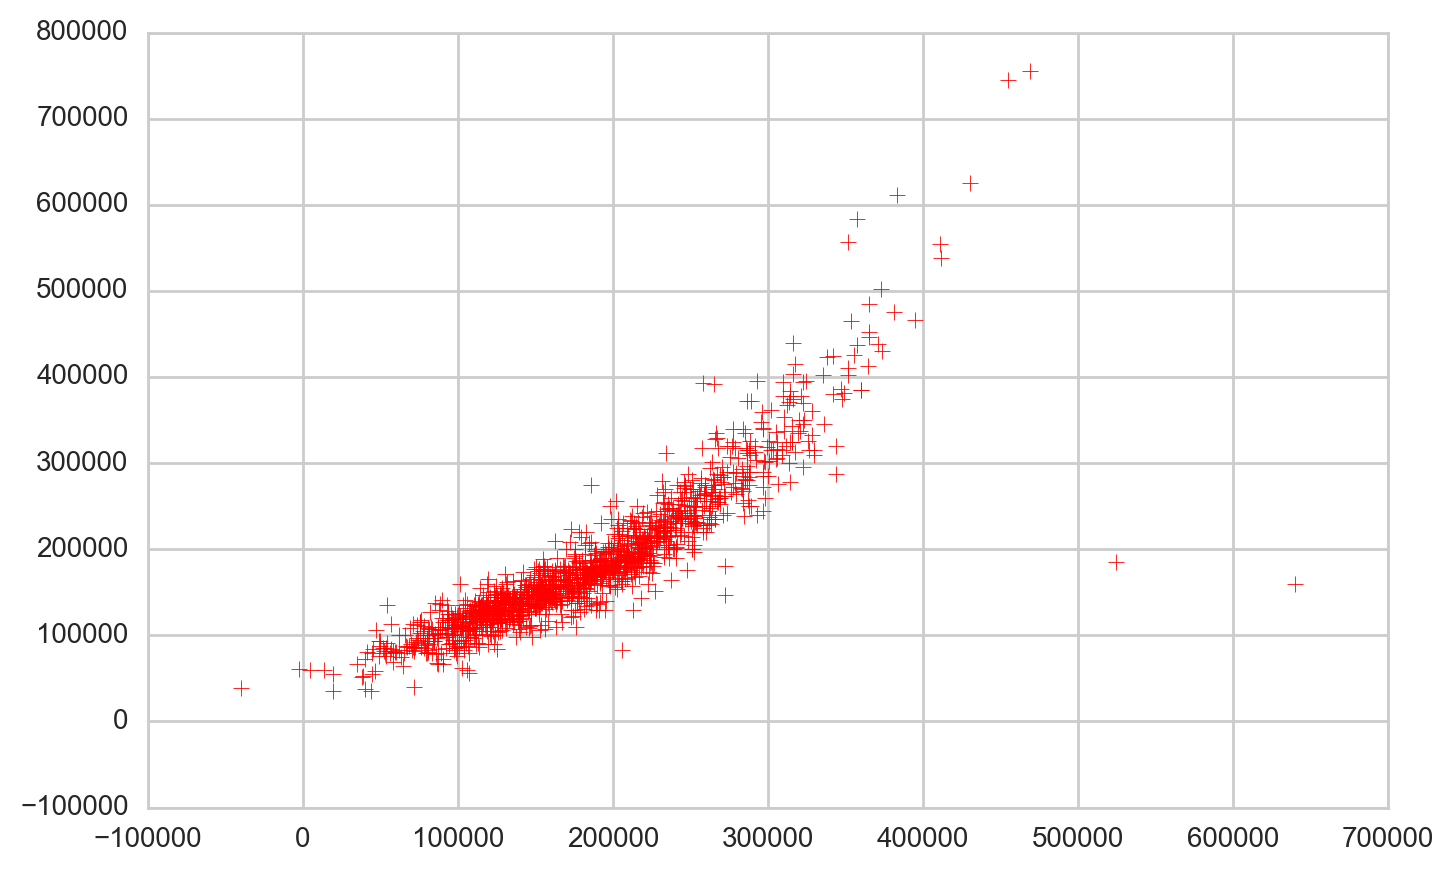

R^2: 0.899345353515
MSE: 1205718818.93


In [56]:
from sklearn import linear_model
lm = linear_model.LinearRegression()


X = house.select_dtypes(include=['int64'])
X.drop(['YrSold','SalePrice'], axis=1, inplace=True)
y = house["SalePrice"]

model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8, 5))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
# plt.xlabel("Predicted Values from RM and LSTAT")
# plt.ylabel("Actual Values MEDV")
plt.show()
print "R^2:",stats.pearsonr(predictions, y)[0]
print 'MSE:', mean_squared_error(predictions, y)

### 8.2 Calculate the $R^2$ of your model.

In [59]:
lm.score(X, y)

0.80882206488834962

### 8.3 Plot the residuals against the true values.

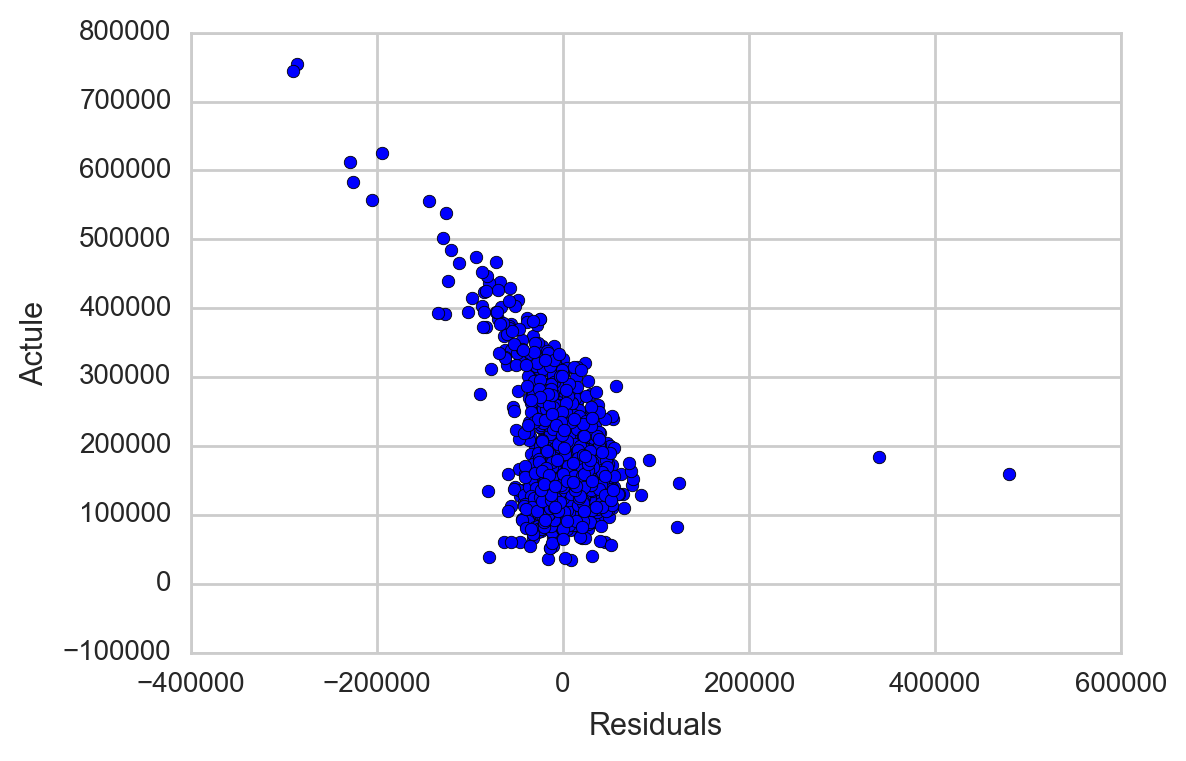

In [60]:
predictions = model.predict(X)
plt.scatter(predictions-y, y)
plt.xlabel('Residuals')
plt.ylabel('Actule')

### 8.4 Plot a histogram of the residuals.

(array([   2.,    2.,    2.,    1.,    9.,   31.,  206.,  868.,  323.,
          12.,    2.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    1.]),
 array([-290203.72247291, -251683.26121621, -213162.79995952,
        -174642.33870282, -136121.87744612,  -97601.41618943,
         -59080.95493273,  -20560.49367603,   17959.96758066,
          56480.42883736,   95000.89009405,  133521.35135075,
         172041.81260745,  210562.27386414,  249082.73512084,
         287603.19637754,  326123.65763423,  364644.11889093,
         403164.58014763,  441685.04140432,  480205.50266102]),
 <a list of 20 Patch objects>)

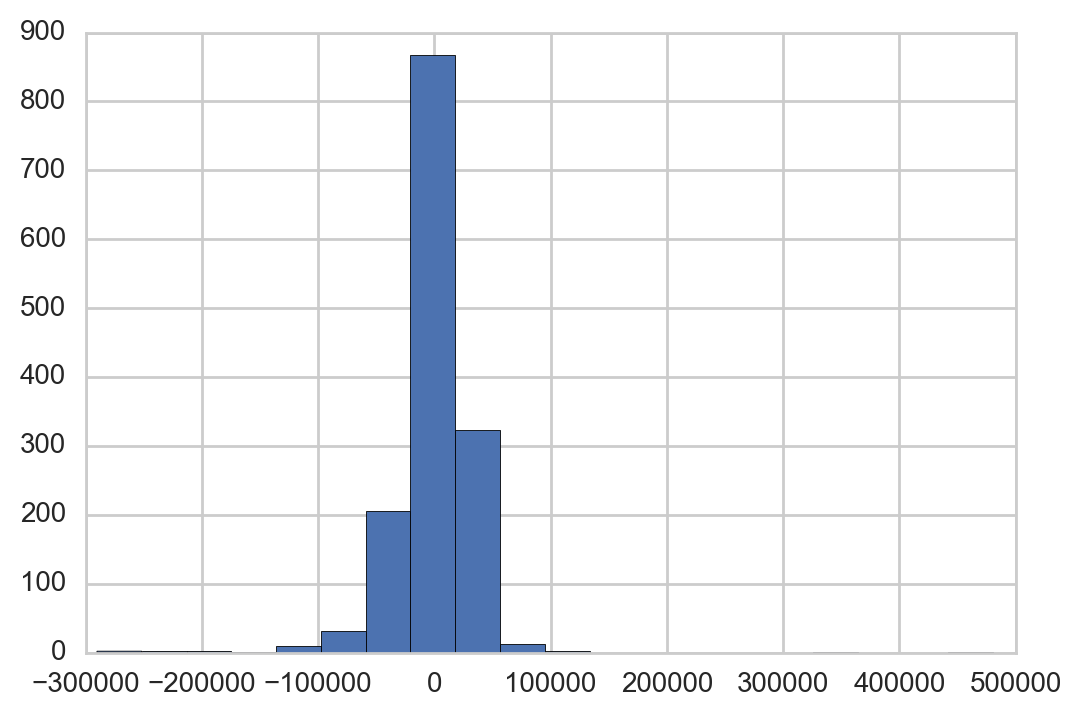

In [61]:
plt.hist(predictions-y, bins=20)


### 8.5 Make a plot to show the strength of the different coefficients.

In [89]:
def ridge_coefs(X, Y):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    lin_reg = LinearRegression()
    
    
    # fit or refit the model on the provided X, Y
    lin_reg.fit(X, Y)
        
    # Get out the coefficient list (first element of the .coef_ attribute)
    coefs.append(lin_reg.coef_[0])
        
    return coefs



# Get the coefficients for each alpha for the Ridge, using the function above
lin_coefs = ridge_coefs(X, SalePrice)

plt.barh(lin_coefs)



//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [   1 1451]

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

In [64]:
l = ['s','d','s']
my_string = l[0]+" + "+l[2]
print my_string
try:
    house.drop('Id', axis=1, inplace=True)
except:
    pass

house.rename(columns = {'1stFlrSF':'FirstFlrSF'}, inplace = True)
house.rename(columns = {'2ndFlrSF':'SecondFlrSF'}, inplace = True)
house.rename(columns = {'3SsnPorch':'TreSanPorch'}, inplace = True)
house.rename(columns = {'1stFlrSF':'FirstFlrSF'}, inplace = True)
continues = house.select_dtypes(include=['int64']).columns.values
ints_for_pats = 'SalePrice ~ ' 
x = 0
for col in continues:
    x = x+1
    if x  > 1:
        ints_for_pats = ints_for_pats + " + " + col
    else:
        ints_for_pats = ints_for_pats + col
ints_for_pats = ints_for_pats + ' -1' 
print ints_for_pats


s + s
SalePrice ~ MSSubClass + MSZoning + LotArea + Street + Alley + LotShape + LandContour + Utilities + LotConfig + LandSlope + Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + OverallQual + OverallCond + YearBuilt + YearRemodAdd + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinSF1 + BsmtFinType2 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + Heating + HeatingQC + CentralAir + Electrical + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + KitchenQual + TotRmsAbvGrd + Functional + Fireplaces + FireplaceQu + GarageType + GarageYrBlt + GarageFinish + GarageCars + GarageArea + GarageQual + GarageCond + PavedDrive + WoodDeckSF + OpenPorchSF + EnclosedPorch + TreSanPorch + ScreenPorch + PoolArea + PoolQC + Fence + MiscFeature + MiscVal + MoSold + YrSold + SaleType + SaleCondition -1


In [68]:
import patsy
import statsmodels.api as sm


house['SalePrice'] = house_full.SalePrice

#df['MDEV'] = y
continues = house.select_dtypes(include=['int64']).columns.values
cats = house.select_dtypes(include=['object']).columns.values

# Init + fit our model using patsy notation (notice no need to slice data / prepare for modeling)
model = sm.formula.ols(formula=str(ints_for_pats), data=house)
results = model.fit()

# Summary statistics
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     730.3
Date:                Sun, 04 Dec 2016   Prob (F-statistic):               0.00
Time:                        23:56:11   Log-Likelihood:                -17059.
No. Observations:                1451   AIC:                         3.427e+04
Df Residuals:                    1376   BIC:                         3.466e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
MSSubClass     -103.5051     45.386     -2.281      0.023      -192.539   -14.472
MSZoning       -252.1644   1620.307     -0.156      0.876     -3430.704  2926.375
LotArea           0.3775      0.106      3.556      0.000         0.169     0.586
Street         3.272e+04   1.41e+04      2.329      0.020      5158.886  6.03e+04
Alley          4059.1660   3777.216      1.075      0.283     -3350.559  1.15e+04
LotShape       -957.6539    663.089     -1.444      0.149     -2258.428   343.120
LandContour    3428.7069   1343.754      2.552      0.011       792.679  6064.735
Utilities     -4.319e+04   3.32e+04     -1.302      0.193     -1.08e+05  2.19e+04
LotConfig       152.8005    544.576      0.281      0.779      -915.489  1221.090
LandSlope      5975.7395   3838.417      1.557      0.120     -1554.043  1.35e+04
Neighborhood    445.5054    155.879      2.858      0.004       139.720   751.291
Condition1     -848.3185   1014.188     -0.836      0.403     -2837.840  1141.203
Condition2    -8685.5846   3361.722     -2.584      0.010     -1.53e+04 -2090.929
BldgType      -2002.9705   1483.328     -1.350      0.177     -4912.799   906.858
HouseStyle    -1102.3930    654.018     -1.686      0.092     -2385.373   180.587
OverallQual    1.118e+04   1190.612      9.394      0.000      8849.128  1.35e+04
OverallCond    5201.3933   1048.711      4.960      0.000      3144.148  7258.638
YearBuilt       245.3387     77.636      3.160      0.002        93.042   397.636
YearRemodAdd    -27.4652     67.875     -0.405      0.686      -160.614   105.684
RoofStyle      2741.0405   1122.774      2.441      0.015       538.506  4943.575
RoofMatl       5177.8171   1511.088      3.427      0.001      2213.531  8142.103
Exterior1st    -974.3066    523.859     -1.860      0.063     -2001.955    53.342
Exterior2nd     337.9917    473.064      0.714      0.475      -590.012  1265.996
MasVnrType     1069.9354   1477.716      0.724      0.469     -1828.885  3968.756
ExterQual     -1.058e+04   1964.814     -5.383      0.000     -1.44e+04 -6723.029
ExterCond       410.2541   1256.484      0.327      0.744     -2054.577  2875.085
Foundation      664.5042   1654.747      0.402      0.688     -2581.596  3910.604
BsmtQual      -4145.7254   1031.687     -4.018      0.000     -6169.575 -2121.876
BsmtCond       1572.7208    969.627      1.622      0.105      -329.387  3474.828
BsmtExposure  -3536.6576    885.810     -3.993      0.000     -5274.342 -1798.973
BsmtFinType1   -708.7996    519.462     -1.364      0.173     -1727.823   310.223
BsmtFinSF1        5.8793      2.888      2.036      0.042         0.215    11.544
BsmtFinType2    315.7669   1047.936      0.301      0.763     -1739.957  2371.491
BsmtFinSF2        2.3846      5.801      0.411      0.681        -8.996    13.765
BsmtUnfSF        -2.9721      2.955     -1.006   

### 9.2 Fit a linear regression using all of the predictors and score it.

In [46]:
from sklearn.preprocessing import LabelEncoder


cat_column_names = house.select_dtypes(include=['object']).columns.values
houseDummys = house
def prepData(df):
    for cat in cat_column_names:
        le = LabelEncoder().fit(house[cat])
        houseDummys[cat] = le.transform(house[cat])

prepData(house)        

try:
    houseDummys.drop('SalePrice', axis=1, inplace=True)
except:
    pass

try:
    houseDummys.drop('Id', axis=1,inplace=True)
except:
    pass

houseDummys.head()

//anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
//anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3         65.0     8450       1      1         3   
1          20         3         80.0     9600       1      1         3   
2          60         3         68.0    11250       1      1         0   
3          70         3         60.0     9550       1      1         0   
4          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  LotConfig      ...        ScreenPorch  PoolArea  \
0            3          0          4      ...                  0         0   
1            3          0          2      ...                  0         0   
2            3          0          4      ...                  0         0   
3            3          0          0      ...                  0         0   
4            3          0          2      ...                  0         0   

   PoolQC  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  \
0       3      4            1        0       2    2008         8   
1       3      4            1        0       5    2007         8   
2       3      4            1        0       9    2008         8   
3       3      4            1        0       2    2006         8   
4       3      4            1        0      12    2008         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              0  
4              4  

[5 rows x 79 columns]

R^2: 0.923605525827
MSE: 923757036.706


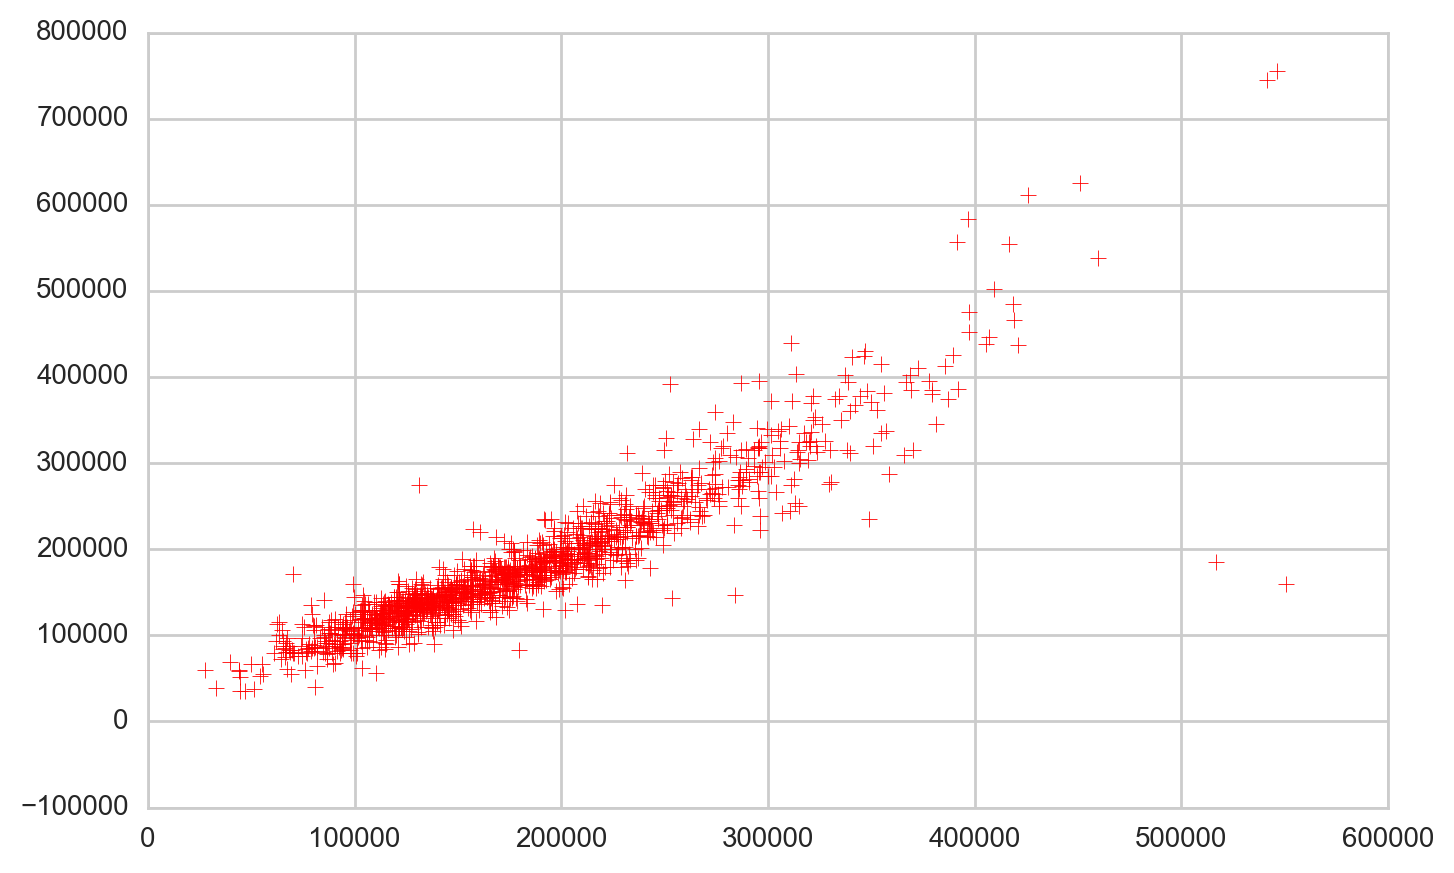

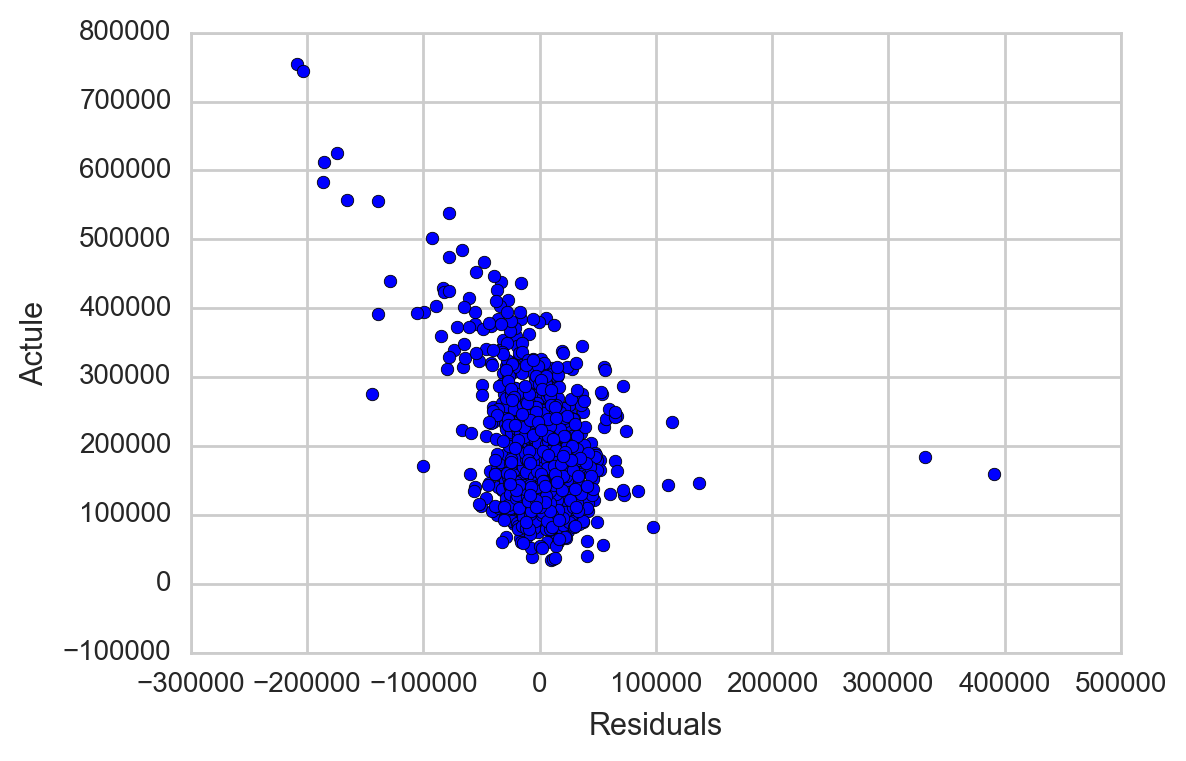

In [92]:

#houseDummys['target'] = y
no_nans_houseDummys = houseDummys.dropna()

#no_nans_houseDummys.pop('Root_SalePrice')
y = no_nans_houseDummys.pop('SalePrice')
#y = no_nans_houseDummys.pop('target')
X = no_nans_houseDummys


model = lm.fit(X, y)
predictions = model.predict(X)
print "R^2:",stats.pearsonr(predictions, y)[0]
print 'MSE:', mean_squared_error(predictions, y)
# Plot the model
plt.figure(figsize=(8, 5))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
# plt.xlabel("Predicted Values from RM and LSTAT")
# plt.ylabel("Actual Values MEDV")
plt.show()

predictions = model.predict(X)
plt.scatter(predictions-y, y)
plt.xlabel('Residuals')
plt.ylabel('Actule')
plt.show()



### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

In [75]:
#I have probaly over fit the data.


//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/__init__.pyc


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

In [101]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(lm, X, y, cv=20, scoring='r2')
print scores, "\n Ararage Score:", (scores.sum()/len(scores))                                           
# def train_test(X_train, X_test, y_train, y_test):
#     model = lm.fit(X, y)
#     predictions = model.predict(X)
#     print "R^2:",stats.pearsonr(predictions, y)[0]
#     print 'MSE:', mean_squared_error(predictions, y)
    

# train_test(train_test_split(X, y, test_size=0.4, random_state=42))


[ 0.90393012  0.88991329  0.7235759   0.89231114  0.9008395   0.91421918
  0.85611521  0.46602661  0.83000507  0.85337858  0.88432485  0.8176047
  0.86479329  0.86889773  0.83107575  0.87171174  0.64756852 -0.84990952
  0.82794321  0.89658794] 
 Ararage Score: 0.744545640374


In [44]:
#lm.coef_
#no_nans_houseDummys.info()
X = no_nans_houseDummys.drop(['3SsnPorch','ScreenPorch','MiscFeature','MoSold','YrSold'], axis=1)
model = lm.fit(X, y)
predictions = model.predict(X)
scores = cross_val_score(lm, X, y, cv=20, scoring='r2')#mean_squared_error
print scores, "\n Ararage Score:", (scores.sum()/len(scores)), "MSE:", mean_squared_error(predictions, y)

NameError: name 'no_nans_houseDummys' is not defined

### 10.2 What does the cross-validated average $R^2$ tell you?

In [105]:
###the one negitive values sujestes that modle is overfitting the data a lot.
#the mean of the values isnt telling me much...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


In [ ]:
###It probaly means that we have chased an outlier and overfit our model.
# it mean that the values you predicted are on the opist side of the sample mean line; worse then the simplest model.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [70]:
from sklearn import grid_search
from sklearn.linear_model import Lasso

LR = Lasso()

search_parameters = {
    'alpha':  [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,1] 
    
}

# Intialize a blank model object


# Initialize gridsearch
estimator = grid_search.GridSearchCV(LR, search_parameters, cv=5)

SalePrice = house_full.pop('SalePrice')


# Fit some data!
results = estimator.fit(house_full, SalePrice)
results.grid_scores_

ValueError: could not convert string to float: Normal

In [5]:
# import sklearn.cross_validation.train_test_split
from sklearn.preprocessing import StandardScaler
# houseDummys
scaler = StandardScaler().fit(houseDummys)
X = scaler.transform(houseDummys)
llCV = linear_model.LassoCV(normalize=True)
llCV.fit(X, y)
llCV_predictions = llCV.predict(X)
#GridSearchCV.
scores = cross_val_score(llCV, X, y, cv=20, scoring='r2')#mean_squared_error
print scores, "\n Ararage Score:", (scores.sum()/len(scores)), "MSE:", mean_squared_error(llCV_predictions, y)

NameError: name 'houseDummys' is not defined

### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

In [ ]:
from sklearn import grid_search
from sklearn.linear_model import Ridge

RR = Ridge()

search_parameters = {
    'alpha':  range(1,5000,50)
    
}

# Initialize gridsearch
estimator = grid_search.GridSearchCV(RR, search_parameters, cv=5)

SalePrice = house_full.pop('SalePrice')


# Fit some data!
results = estimator.fit(house_full, SalePrice)
results.grid_scores_

### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

In [ ]:
#Ridge can handle over laping coraltions better than the standered LM.

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

In [ ]:
#Contained in another file

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**

In [ ]:
#Contained in another file